# First we scrape data from the web

## We get all category anchor elements in order to scrape book data by category

In [ ]:
import requests
from bs4 import BeautifulSoup

url_categories = 'https://www.scribd.com/books/categories'

response = requests.get(url_categories)

soup = BeautifulSoup(response.content, 'html.parser')

category_anchors = soup.select('.interest_link')

category_anchors

[<a class="interest_btn interest_link" href="https://www.scribd.com/books/Career-Growth">Career &amp; Growth</a>,
 <a class="interest_btn interest_link" href="https://www.scribd.com/books/Career-Growth/Careers">Careers</a>,
 <a class="interest_btn interest_link" href="https://www.scribd.com/books/Career-Growth/Job-Hunting">Job Hunting</a>,
 <a class="interest_btn interest_link" href="https://www.scribd.com/books/Career-Growth/Leadership">Leadership</a>,
 <a class="interest_btn interest_link" href="https://www.scribd.com/books/Career-Growth/Mentoring-Coaching">Mentoring &amp; Coaching</a>,
 <a class="interest_btn interest_link" href="https://www.scribd.com/books/Career-Growth/Motivational">Motivational</a>,
 <a class="interest_btn interest_link" href="https://www.scribd.com/books/Career-Growth/Negotiating">Negotiating</a>,
 <a class="interest_btn interest_link" href="https://www.scribd.com/books/Career-Growth/Resumes">Resumes</a>,
 <a class="interest_btn interest_link" href="https://www

## Extract the category urls

In [ ]:
category_urls = []

for anchor in category_anchors:
  category_urls.append(anchor['href'])
  
category_urls

['https://www.scribd.com/books/Career-Growth',
 'https://www.scribd.com/books/Career-Growth/Careers',
 'https://www.scribd.com/books/Career-Growth/Job-Hunting',
 'https://www.scribd.com/books/Career-Growth/Leadership',
 'https://www.scribd.com/books/Career-Growth/Mentoring-Coaching',
 'https://www.scribd.com/books/Career-Growth/Motivational',
 'https://www.scribd.com/books/Career-Growth/Negotiating',
 'https://www.scribd.com/books/Career-Growth/Resumes',
 'https://www.scribd.com/books/Career-Growth/Professional-Skills',
 'https://www.scribd.com/books/Career-Growth/Training',
 'https://www.scribd.com/books/Business',
 'https://www.scribd.com/books/Business/Business-Analytics',
 'https://www.scribd.com/books/Business/Business-Communication',
 'https://www.scribd.com/books/Business/Business-Development',
 'https://www.scribd.com/books/Business/Corporate-Business-History',
 'https://www.scribd.com/books/Business/E-Commerce',
 'https://www.scribd.com/books/Business/Human-Resources-Personnel

## We keep track of urls we have visited for when an error occurs during scraping, we keep track of progress 

### First version of data: only 2 variables (Author and Book title)

In [ ]:
finished_category_urls = set()
books_with_authors = []

In [ ]:
import pandas as pd

headers = {
    'authority': 'www.scribd.com',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.80 Safari/537.36',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-dest': 'document',
    'referer': 'https://www.scribd.com/books/Career-Money/Business-Biography-History',
    'accept-language': 'en-US,en;q=0.9',
    'cookie': '__CJ_nwt=%7B%22nw1723%22%3A4272%7D; _scribd_session=eyJzZXNzaW9uX2lkIjoiZDRiYjkwYTgxYTcwMDViNjE3OTZhYjJjMGQ3MWIyYzMiLCJfY3NyZl90b2tlbiI6IkxvYWF0cGlxcnM4T0JJMm9vQzdkRVk3eHphQ1RkbGRBSkxkc0NrbnhJQTg9In0%3D--f5ad9708231b8feb4b46cd165d01e98bb6f36bb9; _ga=GA1.2.1705841667.1602857026; _gid=GA1.2.1530142236.1602857026; _gcl_au=1.1.984084920.1602857026; __CJ_search_session=%22%5C%22aa081f52-5a36-4ef3-9700-da614e1fb441%5C%22%22; tatari-session-cookie=40fc884f-59f8-f21e-9310-73f9c3c11d36; __ssid=659fd043e288ef21622e911c51d1883; fbm_136494494209=base_domain=.scribd.com; __CJ_session_metadata=%22%7B%5C%22last_facebook_uid%5C%22%3A%5C%221825207548%5C%22%7D%22; __CJ_library:confirm_delete_item_in_list=%22true%22; _hjTLDTest=1; _hjid=da73ac15-7251-4dc5-a9c4-52eef063344c; _hjAbsoluteSessionInProgress=1; fbsr_136494494209=PXoOpMtrtbcst2kHofZcqiUMLKRuKXx8B_doFkFxEEM.eyJ1c2VyX2lkIjoiMTgyNTIwNzU0OCIsImNvZGUiOiJBUUFHd0dDZmxLWS1RU3V0YjhzdURTVXhqMmdnSmNYWmZwRjljNnE2NWFhcFJZX1Z0RGRGSzRtdmh4LXJ4d2gxU3VZNkZRQ2U2NlZEVERXQkJZNHJKMjFsSF8wUEFPdGlUR1dveWJOLVZPa2N1ZmRwanFRWGVfQWNEU0pQZVZZZlZGQkV1SGpSdl9FZnVvQW9KVmo1OGI3Zl8tSXIxUkg1TV9hMkJ6N2J1NDBCVW93MUxBUDZtamFDbWdnM2Q3Y1lLZHFHLWxpU256RmxFUEM5cDNNNHlYMS12dU5sYWpYUGV1TE5zc0hNeS0xTXRzR0FKSFRCek9Cc0otS1cxMnUyRGhfRHpVdmFDdWxuakxRQkloZWhSUGtIeFRVbHJNYzlNT2g3cDRSeVpvamNGa2ROTDl3eXFkM1lVT1E2bWhOVDNtUnQ1NU1pSEdnSHpNTkNudngxdUpBWiIsIm9hdXRoX3Rva2VuIjoiRUFBQUFIOGUwc2dFQkFNUmJ2VUZrdmc0TmdsR2F5OUFMQzNZME1lQVZYWkN0bzVCUEZWMFZzNWhXbnk3YWNDWkI1czgyOXNaQThSZExLbGJGY0t4N3N5UjdtcGdGdldpUW4xdkhQaW1mb08xYzlYRFlxRTJMWkFhMEhNNXAybFBJZTlQdTJLOEh3dUJwcDgxZDNBSUg1NVlmYTJiWkF4QnNwVThlUElYMHZ5SDJ3clNtNFpBdTNZMGUxZEt6WkFna0lSakFBcExZb3FDdkFaRFpEIiwiYWxnb3JpdGhtIjoiSE1BQy1TSEEyNTYiLCJpc3N1ZWRfYXQiOjE2MDI4NTcwNzd9; scribd_ubtc=u%3Dcca3c104-f214-4b03-9853-4883c0fd635f%26h%3D%2FO5uZFJ1egYEXMZ3nCu6Zjgn1G%2FnBQYYMYBlJ%2F8UWP4%3D; fbsr_136494494209=Proa9-4xTzCkZEau1hN2jk1BC_AGEx4hKwW1F5iJB1Q.eyJ1c2VyX2lkIjoiMTgyNTIwNzU0OCIsImNvZGUiOiJBUUQ5UFFlUXZWWFNqYlRSRVR2U0xpem81NUw2QWxqa0FrcE9XY3FIS0pLZ2s2UngycXdQcWZSMHVTQm4wSG1WVXVnRF95OFNIZ05NQThmQmVaM3lRVHRINFViNFVzMnczVWdJeUh5VHRqX1J3UFA0WDQ5eVlCajlTdWFQYXJtWHplZENHYlN5WGlsbDR6YXVGT0FodG9ETWhSQXM5LXRnY2ZBSm4wTEpNWXppbG1ua215ZEhjNHlsVG1YeFVaR0IzOUtHTlg0MmhjNjBHREV2ZjNxdi1vNlhQdFRrV0pzSy1mNVB1QXFCdWk0dlRmNTRGZDZIWkNyUllTcGdSOThyNlJ5a01TSUhHTW9ha2FqaWdFaUV3ODM2cmxEUnF4Q0NsM0dSay1WS1Zkc0JkdHVESUJUck5JQW4tak5mSFBva1FneFVPbTVhZWxhM0VneFQ1bGkwSkFoNiIsIm9hdXRoX3Rva2VuIjoiRUFBQUFIOGUwc2dFQkFHUWlYRm0zTWxVYnVvbzcyWkFpOVpBYWk1ZzNUa3dwWkFhWTRLVXIybG41ZEZnWkMzOFkyRlhLemg4SEo0Sno5T1ZCckVZS0JGa3oyQnlGVFNRYjBKN09vcEFmSHR6c2N1Rk9heWZUVlpDaWNaQlBKcEt1MFpDUkthMlRaQzhwd3lNaEFkTHFtRkNaQ1NxUGZZVEJ2dHNMMVZaQ3NsRFFOUEpnTzR5QmxEeEx2Z3FNYzRBWkF3cGp5c1pEIiwiYWxnb3JpdGhtIjoiSE1BQy1TSEEyNTYiLCJpc3N1ZWRfYXQiOjE2MDI4NTc0Njd9; tatari-cookie-test=37782128; t-ip=1; _uetsid=684c96100fb811eb8d6ad380ddffd51c; _uetvid=684cedc00fb811eb8a420954c5838ac3',
}

for url in category_urls:
  if url in finished_category_urls:
    continue

  response = requests.get(url, headers=headers)

  soup = BeautifulSoup(response.content, 'html.parser')
  view_more_anchor = soup.select('.more_btn > a')[0]
  view_more_url = view_more_anchor['href']

  for page in range(1, 11):
    url_with_page = url + '/all?page=' + str(page)
    response = requests.get(url_with_page, headers=headers)

    print(url, page)

    soup = BeautifulSoup(response.content, 'html.parser')
    book_anchors = soup.select('a.list_anchor')
    
    for anchor in book_anchors:
      book_title = anchor.find(class_='document_title').text
      author = anchor.find(class_='author').text
      books_with_authors.append([book_title, author])

  finished_category_urls.add(url)
  
data = pd.DataFrame(books_with_authors, columns=['Book_Title', 'Author'])

data  

https://www.scribd.com/books/Career-Growth 1


,Book_Title,Author
0,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis
1,Never Split the Difference: Negotiating As If ...,Chris Voss
2,Grit: The Power of Passion and Perseverance,Angela Duckworth
3,Principles: Life and Work,Ray Dalio
4,Building a StoryBrand: Clarify Your Message So...,Donald Miller
5,The 7 Habits of Highly Effective People,Stephen R. Covey
6,The Law of Influence: Lesson 2 from The 21 Irr...,John C. Maxwell
7,The Law of the Picture: Lesson 13 from The 21 ...,John C. Maxwell
8,The Law of the Inner Circle: Lesson 11 from Th...,John C. Maxwell
9,The Law of the Lid: Lesson 1 from The 21 Irref...,John C. Maxwell


In [ ]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of                                               Book_Title                  Author
0                How To Win Friends and Influence People           Dale Carnegie
1      Girl, Stop Apologizing: A Shame-Free Plan for ...           Rachel Hollis
2      Never Split the Difference: Negotiating As If ...              Chris Voss
3                      The Intelligent Investor, Rev. Ed         Benjamin Graham
4      Tribe of Mentors: Short Life Advice from the B...         Timothy Ferriss
...                                                  ...                     ...
13366                                  Westside: A Novel              W.M. Akers
13367                               The Convent's Secret               CJ Archer
13368                          Star Wars: Complete Guide  Wikipedia Contributors
13369  Bad Blood: Secrets and Lies in a Silicon Valle...              dailyBooks
13370                  Moon of the Crusted Snow: A Novel         W

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
data.to_csv('scribd_scraped.csv')
!cp scribd_scraped.csv "drive/My Drive/"

## Now we try to scrape more variables from Scribd using Selenium

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
chr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
finished_category_urls = set()
books_data = []

In [ ]:
import time

for url in category_urls:
  for page in range(1, 11):
    url_with_page = url + '/all?page=' + str(page)

    if url_with_page in finished_category_urls:
      continue

    wd.get(url_with_page)

    print(url_with_page)

    soup = BeautifulSoup(wd.page_source, 'html.parser')
    book_anchors = soup.select('a.list_anchor')
    
    for anchor in book_anchors:
      book_title = anchor.find(class_='document_title').text
      author = anchor.find(class_='author').text
      rating = anchor.find(class_='stats')
      if rating is not None:
        rating = float(rating.text.split('/')[0][1:])
      try:
        n_pages = int(anchor.select('.read_time_estimate > span > span')[0].text.split(' ')[0].replace(',', ''))
      except (ValueError, TypeError):
        n_pages = None
      category = url_with_page.split('/')[-3]
      sub_category = url_with_page.split('/')[-2]

      if category == 'books':
        category = sub_category
        sub_category = None

      books_data.append([book_title, author, rating, n_pages, category, sub_category])

    finished_category_urls.add(url_with_page)

https://www.scribd.com/books/Pets/Essays-Narratives/all?page=4
https://www.scribd.com/books/Pets/Essays-Narratives/all?page=5
https://www.scribd.com/books/Pets/Essays-Narratives/all?page=6
https://www.scribd.com/books/Pets/Essays-Narratives/all?page=7
https://www.scribd.com/books/Pets/Essays-Narratives/all?page=8
https://www.scribd.com/books/Pets/Essays-Narratives/all?page=9
https://www.scribd.com/books/Pets/Essays-Narratives/all?page=10
https://www.scribd.com/books/Pets/Fish-Aquariums/all?page=1
https://www.scribd.com/books/Pets/Fish-Aquariums/all?page=2
https://www.scribd.com/books/Pets/Fish-Aquariums/all?page=3
https://www.scribd.com/books/Pets/Fish-Aquariums/all?page=4
https://www.scribd.com/books/Pets/Fish-Aquariums/all?page=5
https://www.scribd.com/books/Pets/Fish-Aquariums/all?page=6
https://www.scribd.com/books/Pets/Fish-Aquariums/all?page=7
https://www.scribd.com/books/Pets/Fish-Aquariums/all?page=8
https://www.scribd.com/books/Pets/Fish-Aquariums/all?page=9
https://www.scribd

KeyboardInterrupt: ignored

In [ ]:
books_data

[['Girl, Stop Apologizing: A Shame-Free Plan for Embracing and Achieving Your Goals',
  'Rachel Hollis',
  3.5,
  255,
  'Career-Growth',
  None],
 ['Never Split the Difference: Negotiating As If Your Life Depended On It',
  'Chris Voss',
  4.5,
  333,
  'Career-Growth',
  None],
 ['Grit: The Power of Passion and Perseverance',
  'Angela Duckworth',
  4.0,
  439,
  'Career-Growth',
  None],
 ['Principles: Life and Work', 'Ray Dalio', 4.0, 681, 'Career-Growth', None],
 ['Building a StoryBrand: Clarify Your Message So Customers Will Listen',
  'Donald Miller',
  4.0,
  240,
  'Career-Growth',
  None],
 ['The 7 Habits of Highly Effective People',
  'Stephen R. Covey',
  3.0,
  479,
  'Career-Growth',
  None],
 ['The Law of Influence: Lesson 2 from The 21 Irrefutable Laws of Leadership',
  'John C. Maxwell',
  3.0,
  25,
  'Career-Growth',
  None],
 ['The Law of the Picture: Lesson 13 from The 21 Irrefutable Laws of Leadership',
  'John C. Maxwell',
  3.0,
  30,
  'Career-Growth',
  None],

In [ ]:
len(books_data)

120719

In [ ]:
data = pd.DataFrame(books_data, columns=['Book_Title', 'Author', 'Rating', 'Num_Pages', 'Category', 'Subcategory'])

data

,Book_Title,Author,Rating,Num_Pages,Category,Subcategory
0,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis,3.5,255.0,Career-Growth,None
1,Never Split the Difference: Negotiating As If ...,Chris Voss,4.5,333.0,Career-Growth,None
2,Grit: The Power of Passion and Perseverance,Angela Duckworth,4.0,439.0,Career-Growth,None
3,Principles: Life and Work,Ray Dalio,4.0,681.0,Career-Growth,None
4,Building a StoryBrand: Clarify Your Message So...,Donald Miller,4.0,240.0,Career-Growth,None
...,...,...,...,...,...,...
120714,"Phonics for Kindergarten, Grade K",Carson-Dellosa Publishing,0.0,67.0,Children-s,Activity-Books
120715,The Young Investor: Projects and Activities fo...,Katherine R. Bateman,5.0,220.0,Children-s,Activity-Books
120716,Papier-Mache Monsters,Daniel Reeder,4.5,424.0,Children-s,Activity-Books
120717,Garfield's ® Guide to Creating Your Own Comic ...,Marco Finnegan,4.5,30.0,Children-s,Activity-Books


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
data = data.drop_duplicates(subset='Book_Title')

data

,Book_Title,Author,Rating,Num_Pages,Category,Subcategory
0,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis,3.5,255.0,Career-Growth,None
1,Never Split the Difference: Negotiating As If ...,Chris Voss,4.5,333.0,Career-Growth,None
2,Grit: The Power of Passion and Perseverance,Angela Duckworth,4.0,439.0,Career-Growth,None
3,Principles: Life and Work,Ray Dalio,4.0,681.0,Career-Growth,None
4,Building a StoryBrand: Clarify Your Message So...,Donald Miller,4.0,240.0,Career-Growth,None
...,...,...,...,...,...,...
120714,"Phonics for Kindergarten, Grade K",Carson-Dellosa Publishing,0.0,67.0,Children-s,Activity-Books
120715,The Young Investor: Projects and Activities fo...,Katherine R. Bateman,5.0,220.0,Children-s,Activity-Books
120716,Papier-Mache Monsters,Daniel Reeder,4.5,424.0,Children-s,Activity-Books
120717,Garfield's ® Guide to Creating Your Own Comic ...,Marco Finnegan,4.5,30.0,Children-s,Activity-Books


In [ ]:
data.to_csv('scribd_scraped_v3.csv')
!cp scribd_scraped_v3.csv "drive/My Drive/"

## Next we try scraping from other sources as well (Amazon)

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

     |████████████████████████████████| 911kB 4.6MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [40.1 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates In

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


## It's easiest to manually get all category urls

In [ ]:
from bs4 import BeautifulSoup

### Batch 1

In [ ]:
categories_and_urls = []
categories_and_urls.append(('Arts & Photography', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A1&page=2&qid=1604250685&ref=lp_1_pg_2'))
categories_and_urls.append(('Biographies & Memoirs', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A2&page=2&qid=1604251456&ref=lp_2_pg_3'))

### Batch 2

In [ ]:
categories_and_urls = []
categories_and_urls.append(('Business & Money', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A3&page=2&qid=1604255025&ref=lp_3_pg_2'))
categories_and_urls.append(('Christian Books & Bibles', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A12290&page=2&qid=1604255077&ref=lp_12290_pg_2'))
categories_and_urls.append(('Computer & Technology', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A5&page=2&qid=1604255167&ref=lp_5_pg_2'))
categories_and_urls.append(('Cookbooks, Food & Wine', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A6&page=2&qid=1604255206&ref=lp_6_pg_2'))
categories_and_urls.append(('Crafts, Hobbies & Home', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A48&page=2&qid=1604255238&ref=lp_48_pg_2'))

### Batch 3

In [ ]:
categories_and_urls = []
categories_and_urls.append(('Education & Teaching', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A8975347011&page=2&qid=1604255355&ref=lp_8975347011_pg_2'))
categories_and_urls.append(('Engineering', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A173507%2Cn%3A173515&page=2&qid=1604255401&ref=lp_173515_pg_2'))
categories_and_urls.append(('Automotive', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A173507%2Cn%3A10503&page=2&qid=1604255484&ref=lp_10503_pg_2'))
categories_and_urls.append(('Transportation', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A173507%2Cn%3A11934&page=2&qid=1604255525&ref=lp_11934_pg_2'))
categories_and_urls.append(('Health, Fitness & Dieting', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A10&page=2&qid=1604255565&ref=lp_10_pg_2'))
categories_and_urls.append(('History', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A9&page=2&qid=1604255606&ref=lp_9_pg_2'))
categories_and_urls.append(('Humor & Entertainment', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A86&page=2&qid=1604255639&ref=lp_86_pg_2'))
categories_and_urls.append(('Law', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A10777&page=2&qid=1604255675&ref=lp_10777_pg_2'))


### Batch 4

In [ ]:
categories_and_urls = []
# categories_and_urls.append(('', ''))
categories_and_urls.append(('Literature & Fiction', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A17&page=2&qid=1604255700&ref=lp_17_pg_2'))
categories_and_urls.append(('Medical Books & Textbooks', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A173514&page=2&qid=1604257947&ref=lp_173514_pg_2'))
categories_and_urls.append(('Mystery, Thriller & Suspense', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A18&page=2&qid=1604257980&ref=lp_18_pg_2'))
categories_and_urls.append(('Parenting & Relationships', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A20&page=2&qid=1604258340&ref=lp_20_pg_2'))
categories_and_urls.append(('Politics & Social Sciences', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A3377866011&page=2&qid=1604258369&ref=lp_3377866011_pg_2'))
categories_and_urls.append(('Religion & Spirituality', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A22&page=2&qid=1604258413&ref=lp_22_pg_2'))
categories_and_urls.append(('Romance', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A23&page=2&qid=1604258436&ref=lp_23_pg_2'))


### Batch 5

In [ ]:
categories_and_urls = []
categories_and_urls.append(('Science Fiction & Fantasy', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A25&page=2&qid=1604258506&ref=lp_25_pg_2'))
categories_and_urls.append(('Self-Help', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A4736&page=2&qid=1604258559&ref=lp_4736_pg_2'))
categories_and_urls.append(('Sports & Outdoors', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A26&page=2&qid=1604258581&ref=lp_26_pg_2'))
categories_and_urls.append(('Teen & Young Adult', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A28&page=2&qid=1604258607&ref=lp_28_pg_2'))
categories_and_urls.append(('Science & Math', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A75&page=2&qid=1604258458&ref=lp_75_pg_2'))
categories_and_urls.append(('Travel', 'https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A27&page=2&qid=1604258661&ref=lp_27_pg_2'))

In [ ]:
# books_data = []
finished_urls = set()

In [ ]:
import re

for category, url in categories_and_urls:
  print(category)
  for page in range(2, 76):

    url_with_page = url.replace('&page=2', f'&page={page}')
    if url_with_page in finished_urls:
      continue

    print(url_with_page)
    wd.get(url_with_page)
    soup = BeautifulSoup(wd.page_source, 'html.parser')

    books = soup.select('.sg-col-4-of-12.sg-col-8-of-16.sg-col-16-of-24.sg-col-12-of-20.sg-col-24-of-32.sg-col.sg-col-28-of-36.sg-col-20-of-28')
    
    for book in books:
      book = book.select('.sg-col-inner')[0]
      # Book title
      book_title = book.select('div > div > div > div > h2 > a > span')[0].text

      # Authors
      authors_elements = book.select('div.a-row.a-size-base.a-color-secondary > a')
      authors = []
      for author in authors_elements:
        authors.append(author.text.strip())
      authors = ', '.join(authors)

      # Rating
      rating = book.select('div.a-section.a-spacing-none.a-spacing-top-micro')
      if not rating:
        continue
      rating = rating[0].select('span')
      if not rating:
        continue
      if not rating[0].has_attr('aria-label'):
        rating = None
      else:
        rating = rating[0]['aria-label'].split()[0]

      # Num of ratings
      n_ratings = book.select('.a-spacing-top-micro > div > span')
      if len(n_ratings) < 2:
        continue
      n_ratings = int(n_ratings[1]['aria-label'].replace(',', ''))

      # Date
      date = book.select('span.a-color-secondary')
      if len(date) < 2:
        date = None
      else:
        date = date[1].text

      if date == ' | ':
        if len(date) > 2:
          date = book.select('span.a-color-secondary')[2].text
        else:
          date = None

      # Prices
      prices = book.select('span.a-offscreen')
      if not prices:
        discounted_price, original_price = None, None
      else:
        discounted_price = prices[0].text
        if len(prices) > 1:
          original_price = book.select('span.a-offscreen')[1].text
        else:
          original_price = discounted_price
          discounted_price = None
      books_data.append([book_title, authors, category, rating, n_ratings, date, discounted_price, original_price])
  #   break
  # break

    finished_urls.add(url_with_page)

Science Fiction & Fantasy
https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A25&page=2&qid=1604258506&ref=lp_25_pg_2
https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A25&page=3&qid=1604258506&ref=lp_25_pg_2
https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A25&page=4&qid=1604258506&ref=lp_25_pg_2
https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A25&page=5&qid=1604258506&ref=lp_25_pg_2
https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A25&page=6&qid=1604258506&ref=lp_25_pg_2
https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A25&page=7&qid=1604258506&ref=lp_25_pg_2
https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A25&page=8&qid=1604258506&ref=lp_25_pg_2
https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A25&page=9&qid=1604258506&ref=lp_25_pg_2
https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A25&page=10&qid=1604258506&ref=lp_25_pg_2
https://www.amazon.com/s?rh=n%3A283155%2Cn%3A%211000%2Cn%3A25&page=11&qid=16042585

In [ ]:
len(books_data)

14961

In [ ]:
books_data[-5:]

[['The Phantom Atlas: The Greatest Myths, Lies and Blunders on Maps (Historical Map and Mythology Book, Geography Book of Ancient and Antique Maps)',
  'Edward Brooke-Hitching',
  'Travel',
  '4.6',
  472,
  'Apr 3, 2018',
  '$22.24',
  '$29.95'],
 ['Trees of Ohio Field Guide (Tree Identification Guides)',
  'Stan Tekiela',
  'Travel',
  '4.7',
  140,
  'Apr 6, 2004',
  '$12.17',
  '$12.95'],
 ['Lonely Planet Cancun, Cozumel & the Yucatan (Regional Guide)',
  'Lonely Planet, Ray Bartlett',
  'Travel',
  '4.5',
  98,
  'Jul 16, 2019',
  '$15.83',
  '$21.99'],
 ['Rocky Mountain National Park (National Geographic Trails Illustrated Map)',
  '',
  'Travel',
  '4.8',
  341,
  'Jan 1, 2019',
  '$6.51',
  '$14.95'],
 ['English for Everyone: Level 2: Beginner, Course Book: A Complete Self-Study Program',
  'Part of: English for Everyone (13 Books)',
  'Travel',
  '4.6',
  203,
  'Jun 28, 2016',
  '$15.23',
  '$17.95']]

In [ ]:
import pandas as pd

#book_title, authors, category, rating, n_ratings, date, discounted_price, original_price
columns = ['Book_Title', 'Authors', 'Category', 'Rating', 'NumRatings', 'Date', 'DiscountedPrice', 'OriginalPrice']
df = pd.DataFrame(books_data, columns=columns)

df

,Book_Title,Authors,Category,Rating,NumRatings,Date,DiscountedPrice,OriginalPrice
0,Fortune and Glory: A Novel (A Stephanie Plum N...,"Book 27 of 27: Stephanie Plum, Janet Evanovich",Literature & Fiction,3.8,5,"Nov 3, 2020",$14.99,$28.99
1,1984 (Signet Classics),George Orwell,Literature & Fiction,4.7,26042,"Jul 1, 1950",$6.86,$9.99
2,Troubles in Paradise,"Book 3 of 3: Paradise, Elin Hilderbrand",Literature & Fiction,4.5,3270,"Oct 6, 2020",$14.99,$28.00
3,The Harbinger II: The Return,"Book 2 of 2: The Harbinger, Jonathan Cahn",Literature & Fiction,4.9,4479,"Sep 1, 2020",$17.48,$24.99
4,The Book of Two Ways: A Novel,Jodi Picoult,Literature & Fiction,4.0,2800,"Sep 22, 2020",$14.99,$28.99
...,...,...,...,...,...,...,...,...
14956,"The Phantom Atlas: The Greatest Myths, Lies an...",Edward Brooke-Hitching,Travel,4.6,472,"Apr 3, 2018",$22.24,$29.95
14957,Trees of Ohio Field Guide (Tree Identification...,Stan Tekiela,Travel,4.7,140,"Apr 6, 2004",$12.17,$12.95
14958,"Lonely Planet Cancun, Cozumel & the Yucatan (R...","Lonely Planet, Ray Bartlett",Travel,4.5,98,"Jul 16, 2019",$15.83,$21.99
14959,Rocky Mountain National Park (National Geograp...,,Travel,4.8,341,"Jan 1, 2019",$6.51,$14.95


In [ ]:
df.to_csv('amazon_batch_4_5.csv')
!cp amazon_batch_4_5.csv "drive/My Drive/"

In [ ]:
len(df['Book_Title'].unique())

11499

# Exploratory data analysis of the Goodreads Dataset (downloaded from Kaggle)

https://www.kaggle.com/jealousleopard/goodreadsbooks


In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

path = Path('/content/drive/My Drive/PR Proekt/goodreads_books.csv')
data = pd.read_csv(path, error_bad_lines=False)

data.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
print("Dataset has shape of {} rows and {} columns".format(*data.shape))

Dataset has shape of 11123 rows and 12 columns


Columns Description:
*   bookID Contains the unique ID for each book/series
*   title contains the titles of the books
*   authors contains the author of the particular book
*   average_rating the average rating of the books, as decided by the users
*   ISBN ISBN(10) number, tells the information about a book - such as edition and publisher
*   ISBN 13 The new format for ISBN, implemented in 2007. 13 digits
*   language_code Tells the language for the books
*   Num_pages Contains the number of pages for the book
*   Ratings_count Contains the number of ratings given for the book
*   text_reviews_count Has the count of reviews left by users



# We check if there are missing values

In [ ]:
data.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

# We check to see which are the best rated books

In [ ]:
top_rated_books = data.loc[data['ratings_count'] > 1000000]
top_rated_books = top_rated_books.sort_values(by='average_rating', ascending=False).head(20)

top_rated_books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
5270,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,0375831002,9780375831003,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf


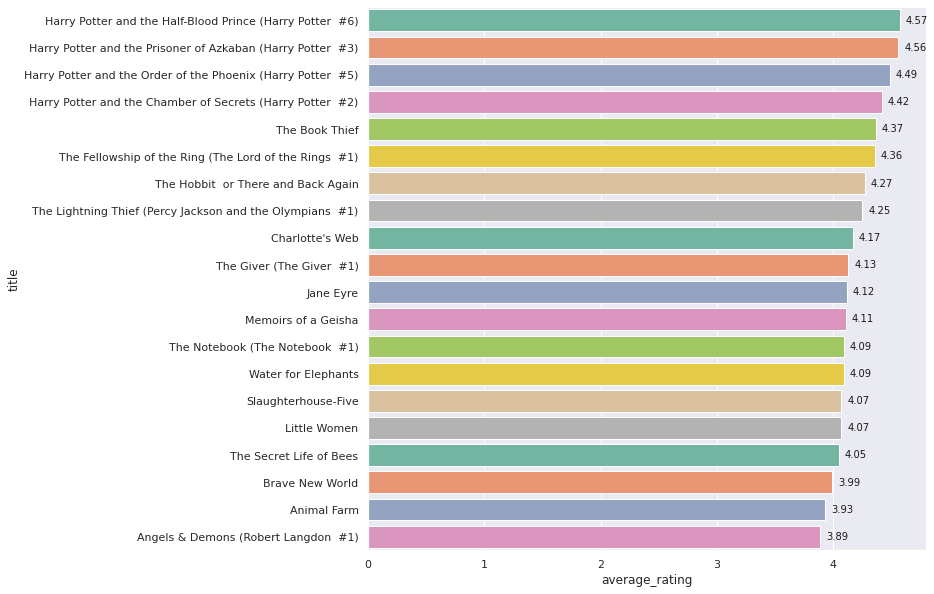

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="average_rating", y="title", data=top_rated_books, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()


## Language distribution

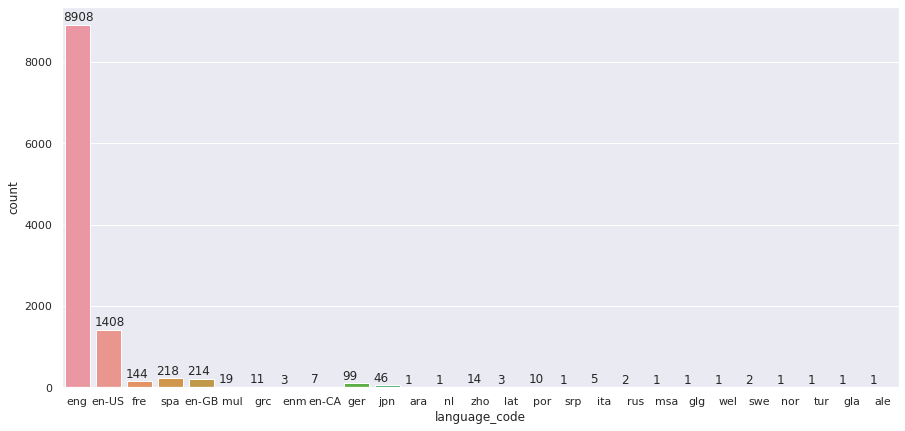

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=data.language_code, data=data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.05, p.get_height()+100))

# Which authors have the most books

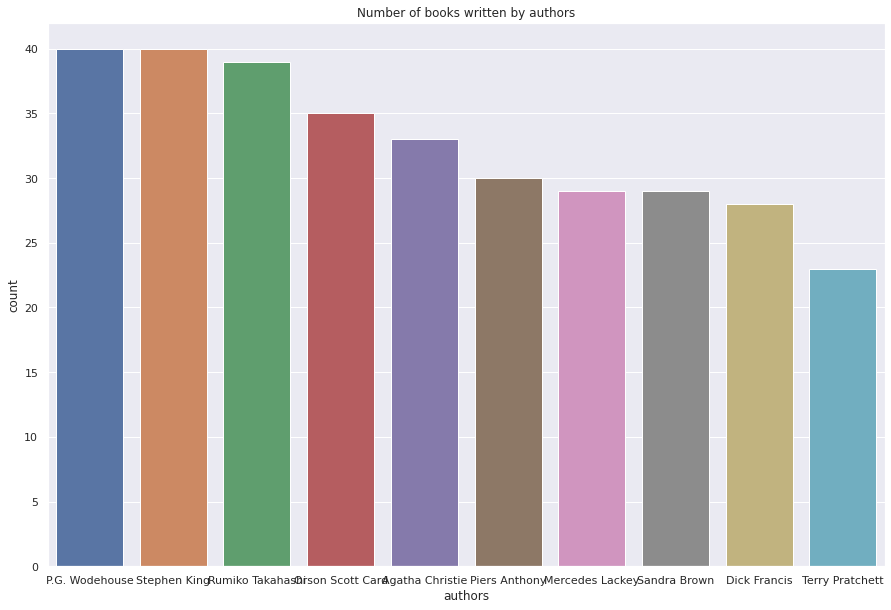

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Number of books written by authors")
sns.countplot(x = "authors", order=data['authors'].value_counts().index[0:10], data=data)

# Distribution of book ratings

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


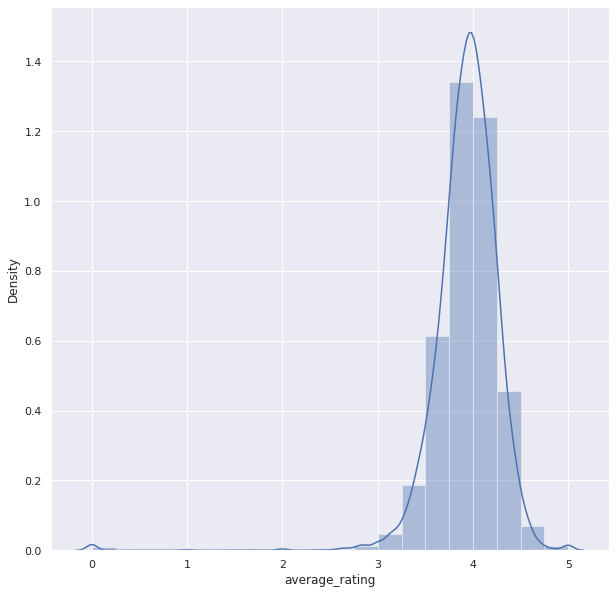

In [ ]:
plt.figure(figsize=(10,10))
rating = data.average_rating.astype(float)
sns.distplot(rating, bins=20)

# Cloud of the most frequent words in titles

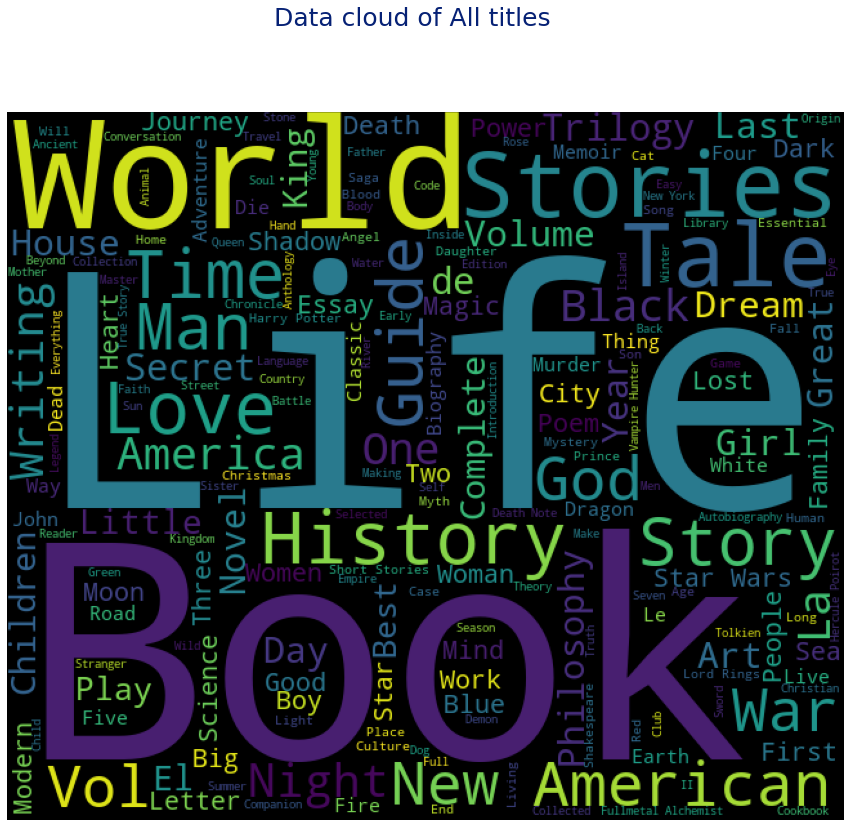

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

title_value = data.title.unique()
plt.subplots(figsize=(15,15))
wordcloud = \
  WordCloud(
    background_color='#000',
    width=650,
    height=550,
    stopwords=STOPWORDS,
  ).generate(" ".join(title_value))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.figtext(.5,.91,'Data cloud of All titles', color='#062175', fontsize=25, ha='center')
plt.show()

# Which are the top 10 most rated books (with highest number of ratings)

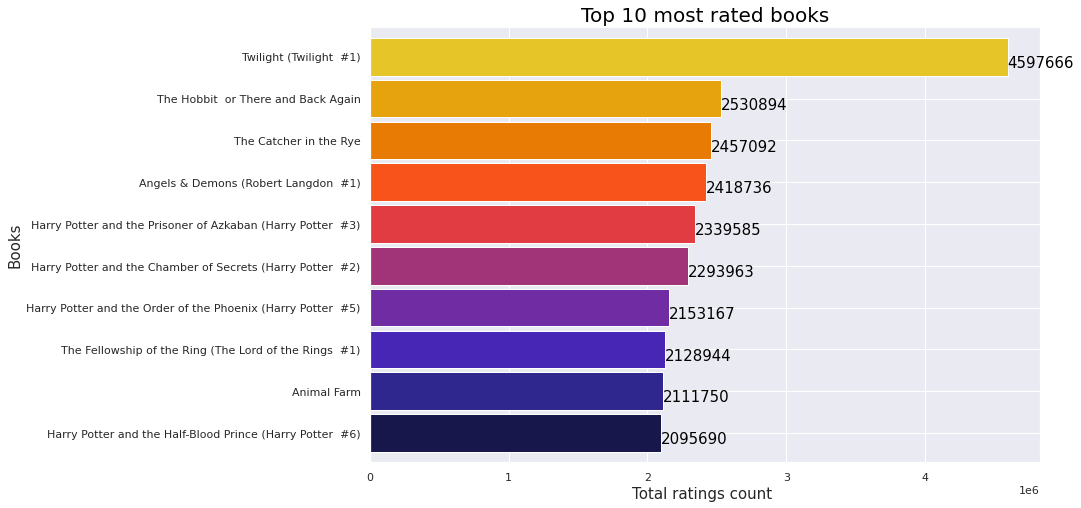

In [ ]:
most_rated = data.sort_values('ratings_count',ascending=False).head(10).set_index('title')
plt.subplots(figsize=(12,8))
ax = most_rated['ratings_count'].sort_values().plot.barh(width=0.9,color=sns.color_palette('CMRmap',12))
ax.set_xlabel("Total ratings count ", fontsize=15)
ax.set_ylabel("Books", fontsize=15)
ax.set_title("Top 10 most rated books",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

amazon_data_first_batch = pd.read_csv('/content/drive/MyDrive/PR Proekt/amazon_batch_1_2_3.csv')
amazon_data_first_batch = amazon_data_first_batch.drop(columns='Unnamed: 0')

amazon_data_first_batch

,Book_Title,Authors,Category,Rating,NumRatings,Date,DiscountedPrice,OriginalPrice
0,Hallmark Channel Countdown to Christmas: Have ...,Caroline McKenzie,Arts & Photography,4.6,77,"Oct 20, 2020",$15.57,$28.00
1,Jimmy Page: The Anthology,Jimmy Page,Arts & Photography,4.7,47,"Oct 20, 2020",$36.00,$60.00
2,"The Antiquarian Sticker Book: Over 1,000 Exqui...",Odd Dot,Arts & Photography,4.8,2443,"Mar 3, 2020",$17.49,$24.99
3,Chanel: Collections and Creations,NaN,Arts & Photography,4.9,4397,"Sep 17, 2007",$31.49,$40.00
4,50 Shades Of Bullsh*t: Dark Edition: Swear Wor...,Alex Fleming,Arts & Photography,4.6,3049,"May 19, 2016",NaN,$5.99
...,...,...,...,...,...,...,...,...
17185,"Robert's Rules of Order: A Simplified, Updated...",Henry M. Robert,Law,4.4,391,"Aug 1, 1989",$3.59,$5.99
17186,Supreme Ambition: Brett Kavanaugh and the Cons...,Ruth Marcus,Law,4.2,73,"Dec 3, 2019",$20.99,$28.00
17187,A Muslim American Slave: The Life of Omar Ibn ...,NaN,Law,4.6,100,"Jul 20, 2011",$16.31,$19.95
17188,My Seditious Heart: Collected Nonfiction,Arundhati Roy,Law,4.6,96,"Jun 11, 2019",$22.49,$31.95


In [ ]:
amazon_data_second_batch = pd.read_csv('/content/drive/MyDrive/PR Proekt/amazon_batch_4_5.csv')
amazon_data_second_batch = amazon_data_second_batch.drop(columns='Unnamed: 0')

amazon_data_second_batch

,Book_Title,Authors,Category,Rating,NumRatings,Date,DiscountedPrice,OriginalPrice
0,Fortune and Glory: A Novel (A Stephanie Plum N...,"Book 27 of 27: Stephanie Plum, Janet Evanovich",Literature & Fiction,3.8,5,"Nov 3, 2020",$14.99,$28.99
1,1984 (Signet Classics),George Orwell,Literature & Fiction,4.7,26042,"Jul 1, 1950",$6.86,$9.99
2,Troubles in Paradise,"Book 3 of 3: Paradise, Elin Hilderbrand",Literature & Fiction,4.5,3270,"Oct 6, 2020",$14.99,$28.00
3,The Harbinger II: The Return,"Book 2 of 2: The Harbinger, Jonathan Cahn",Literature & Fiction,4.9,4479,"Sep 1, 2020",$17.48,$24.99
4,The Book of Two Ways: A Novel,Jodi Picoult,Literature & Fiction,4.0,2800,"Sep 22, 2020",$14.99,$28.99
...,...,...,...,...,...,...,...,...
14956,"The Phantom Atlas: The Greatest Myths, Lies an...",Edward Brooke-Hitching,Travel,4.6,472,"Apr 3, 2018",$22.24,$29.95
14957,Trees of Ohio Field Guide (Tree Identification...,Stan Tekiela,Travel,4.7,140,"Apr 6, 2004",$12.17,$12.95
14958,"Lonely Planet Cancun, Cozumel & the Yucatan (R...","Lonely Planet, Ray Bartlett",Travel,4.5,98,"Jul 16, 2019",$15.83,$21.99
14959,Rocky Mountain National Park (National Geograp...,NaN,Travel,4.8,341,"Jan 1, 2019",$6.51,$14.95


## Joining the 2 batches into one

In [ ]:
amazon_data = pd.concat([amazon_data_first_batch, amazon_data_second_batch])

amazon_data

,Book_Title,Authors,Category,Rating,NumRatings,Date,DiscountedPrice,OriginalPrice
0,Hallmark Channel Countdown to Christmas: Have ...,Caroline McKenzie,Arts & Photography,4.6,77,"Oct 20, 2020",$15.57,$28.00
1,Jimmy Page: The Anthology,Jimmy Page,Arts & Photography,4.7,47,"Oct 20, 2020",$36.00,$60.00
2,"The Antiquarian Sticker Book: Over 1,000 Exqui...",Odd Dot,Arts & Photography,4.8,2443,"Mar 3, 2020",$17.49,$24.99
3,Chanel: Collections and Creations,NaN,Arts & Photography,4.9,4397,"Sep 17, 2007",$31.49,$40.00
4,50 Shades Of Bullsh*t: Dark Edition: Swear Wor...,Alex Fleming,Arts & Photography,4.6,3049,"May 19, 2016",NaN,$5.99
...,...,...,...,...,...,...,...,...
14956,"The Phantom Atlas: The Greatest Myths, Lies an...",Edward Brooke-Hitching,Travel,4.6,472,"Apr 3, 2018",$22.24,$29.95
14957,Trees of Ohio Field Guide (Tree Identification...,Stan Tekiela,Travel,4.7,140,"Apr 6, 2004",$12.17,$12.95
14958,"Lonely Planet Cancun, Cozumel & the Yucatan (R...","Lonely Planet, Ray Bartlett",Travel,4.5,98,"Jul 16, 2019",$15.83,$21.99
14959,Rocky Mountain National Park (National Geograp...,NaN,Travel,4.8,341,"Jan 1, 2019",$6.51,$14.95


### Some Author column values appear to have a some text which is not an author so we filter out that part

In [ ]:
amazon_data['Authors'] = amazon_data['Authors'].astype(str).apply(lambda row: ', '.join([x for x in row.split(', ') if 'Book' not in x and 'of' not in x]))

amazon_data['Authors']

0                  Caroline McKenzie
1                         Jimmy Page
2                            Odd Dot
3                                nan
4                       Alex Fleming
                    ...             
14956         Edward Brooke-Hitching
14957                   Stan Tekiela
14958    Lonely Planet, Ray Bartlett
14959                            nan
14960                               
Name: Authors, Length: 32151, dtype: object

### We check to see if it is filtered

In [ ]:
amazon_data.loc[amazon_data['Authors'].str.contains('Book')]

,Book_Title,Authors,Category,Rating,NumRatings,Date,DiscountedPrice,OriginalPrice


## We print all the categories of Amazon books in order to map the categories from all datasets into one single set of categories

In [ ]:
for category in amazon_data.Category.unique():
  print(category)

Arts & Photography
Biographies & Memoirs
Business & Money
Christian Books & Bibles
Computer & Technology
Cookbooks, Food & Wine
Crafts, Hobbies & Home
Education & Teaching
Engineering
Automotive
Transportation
Health, Fitness & Dieting
History
Humor & Entertainment
Law
Literature & Fiction
Medical Books & Textbooks
Mystery, Thriller & Suspense
Parenting & Relationships
Politics & Social Sciences
Religion & Spirituality
Romance
Science Fiction & Fantasy
Self-Help
Sports & Outdoors
Teen & Young Adult
Science & Math
Travel


In [ ]:
scribd_data = pd.read_csv('/content/drive/MyDrive/PR Proekt/scribd_scraped_v3.csv')
scribd_data = scribd_data.drop(columns='Unnamed: 0')

scribd_data

,Book_Title,Author,Rating,Num_Pages,Category,Subcategory
0,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis,3.5,255.0,Career-Growth,NaN
1,Never Split the Difference: Negotiating As If ...,Chris Voss,4.5,333.0,Career-Growth,NaN
2,Grit: The Power of Passion and Perseverance,Angela Duckworth,4.0,439.0,Career-Growth,NaN
3,Principles: Life and Work,Ray Dalio,4.0,681.0,Career-Growth,NaN
4,Building a StoryBrand: Clarify Your Message So...,Donald Miller,4.0,240.0,Career-Growth,NaN
...,...,...,...,...,...,...
76594,"Phonics for Kindergarten, Grade K",Carson-Dellosa Publishing,0.0,67.0,Children-s,Activity-Books
76595,The Young Investor: Projects and Activities fo...,Katherine R. Bateman,5.0,220.0,Children-s,Activity-Books
76596,Papier-Mache Monsters,Daniel Reeder,4.5,424.0,Children-s,Activity-Books
76597,Garfield's ® Guide to Creating Your Own Comic ...,Marco Finnegan,4.5,30.0,Children-s,Activity-Books


In [ ]:
for category in scribd_data.Category.unique():
  print(category)

Career-Growth
Business
Finance-Money-Management
Politics
Sports-Recreation
Games-Activities
Social-Science
True-Crime
Travel
Pets
Cookbooks-Food-Wine
Bio-Memoir
Reference
Study-Aids-Test-Prep
Language-Arts-Discipline
Foreign-Language-Studies
Teaching-Methods-Materials
Law
Home-Garden
Art
Self-Improvement
Wellness
Science-Mathematics
Computers
Technology-Engineering
History
Religion-Spirituality
Horror-Fiction
Humor-Satire
Mystery-Thriller-Crime-Fiction
Contemporary-Fiction
Young-Adult
Science-Fiction-Fantasy
Romance
Classics
Children-s


## Mapping categories from Scribd to categories from Amazon books

In [ ]:
scribd_to_amazon_category_mapper = dict()
scribd_to_amazon_category_mapper['Career-Growth'] = 'Self-Help'
scribd_to_amazon_category_mapper['Business'] = 'Business & Money'
scribd_to_amazon_category_mapper['Finance-Money-Management'] = 'Business & Money'
scribd_to_amazon_category_mapper['Politics'] = 'Politics & Social Sciences'
scribd_to_amazon_category_mapper['Sports-Recreation'] = 'Sports & Outdoors'
scribd_to_amazon_category_mapper['Games-Activities'] = 'Humor & Entertainment'
scribd_to_amazon_category_mapper['Social-Science'] = 'Politics & Social Sciences'
scribd_to_amazon_category_mapper['True-Crime'] = 'Mystery, Thriller & Suspense'
scribd_to_amazon_category_mapper['Travel'] = 'Travel'
scribd_to_amazon_category_mapper['Pets'] = 'Crafts, Hobbies & Home'
scribd_to_amazon_category_mapper['Cookbooks-Food-Wine'] = 'Cookbooks, Food & Wine'
scribd_to_amazon_category_mapper['Bio-Memoir'] = 'Biographies & Memoirs'
scribd_to_amazon_category_mapper['Reference'] = 'Reference' # this one we dont have in the dataset
scribd_to_amazon_category_mapper['Study-Aids-Test-Prep'] = 'Education & Teaching'
scribd_to_amazon_category_mapper['Language-Arts-Discipline'] = 'Education & Teaching'
scribd_to_amazon_category_mapper['Foreign-Language-Studies'] = 'Reference'
scribd_to_amazon_category_mapper['Teaching-Methods-Materials'] = 'Education & Teaching'
scribd_to_amazon_category_mapper['Law'] = 'Law'
scribd_to_amazon_category_mapper['Home-Garden'] = 'Crafts, Hobbies & Home'
scribd_to_amazon_category_mapper['Art'] = 'Arts & Photography'
scribd_to_amazon_category_mapper['Self-Improvement'] = 'Self-Help'
scribd_to_amazon_category_mapper['Wellness'] = 'Health, Fitness & Dieting'
scribd_to_amazon_category_mapper['Science-Mathematics'] = 'Science & Math'
scribd_to_amazon_category_mapper['Computers'] = 'Computer & Technology'
scribd_to_amazon_category_mapper['Technology-Engineering'] = 'Computer & Technology'
scribd_to_amazon_category_mapper['History'] = 'History'
scribd_to_amazon_category_mapper['Religion-Spirituality'] = 'Religion & Spirituality'
scribd_to_amazon_category_mapper['Horror-Fiction'] = 'Literature & Fiction'
scribd_to_amazon_category_mapper['Humor-Satire'] = 'Humor & Entertainment'
scribd_to_amazon_category_mapper['Mystery-Thriller-Crime-Fiction'] = 'Mystery, Thriller & Suspense'
scribd_to_amazon_category_mapper['Contemporary-Fiction'] = 'Literature & Fiction'
scribd_to_amazon_category_mapper['Young-Adult'] = 'Teen & Young Adult'
scribd_to_amazon_category_mapper['Science-Fiction-Fantasy'] = 'Science Fiction & Fantasy'
scribd_to_amazon_category_mapper['Romance'] = 'Romance'
scribd_to_amazon_category_mapper['Classics'] = 'Literature & Fiction'
scribd_to_amazon_category_mapper['Children-s'] = 'Childrens' # we dont have this one

## We map categories in the Scribd dataset to categories of the Amazon dataset and print the newly mapped categories

In [ ]:
scribd_data['Category'] = scribd_data['Category'].astype(str).apply(lambda c: scribd_to_amazon_category_mapper[c])

for category in scribd_data['Category'].unique():
  print(category)

Self-Help
Business & Money
Politics & Social Sciences
Sports & Outdoors
Humor & Entertainment
Mystery, Thriller & Suspense
Travel
Crafts, Hobbies & Home
Cookbooks, Food & Wine
Biographies & Memoirs
Reference
Education & Teaching
Law
Arts & Photography
Health, Fitness & Dieting
Science & Math
Computer & Technology
History
Religion & Spirituality
Literature & Fiction
Teen & Young Adult
Science Fiction & Fantasy
Romance
Childrens


In [ ]:
scribd_data.columns, amazon_data.columns

(Index(['Book_Title', 'Author', 'Rating', 'Num_Pages', 'Category',
        'Subcategory'],
       dtype='object'),
 Index(['Book_Title', 'Authors', 'Category', 'Rating', 'NumRatings', 'Date',
        'DiscountedPrice', 'OriginalPrice'],
       dtype='object'))

# EDA of Amazon dataset

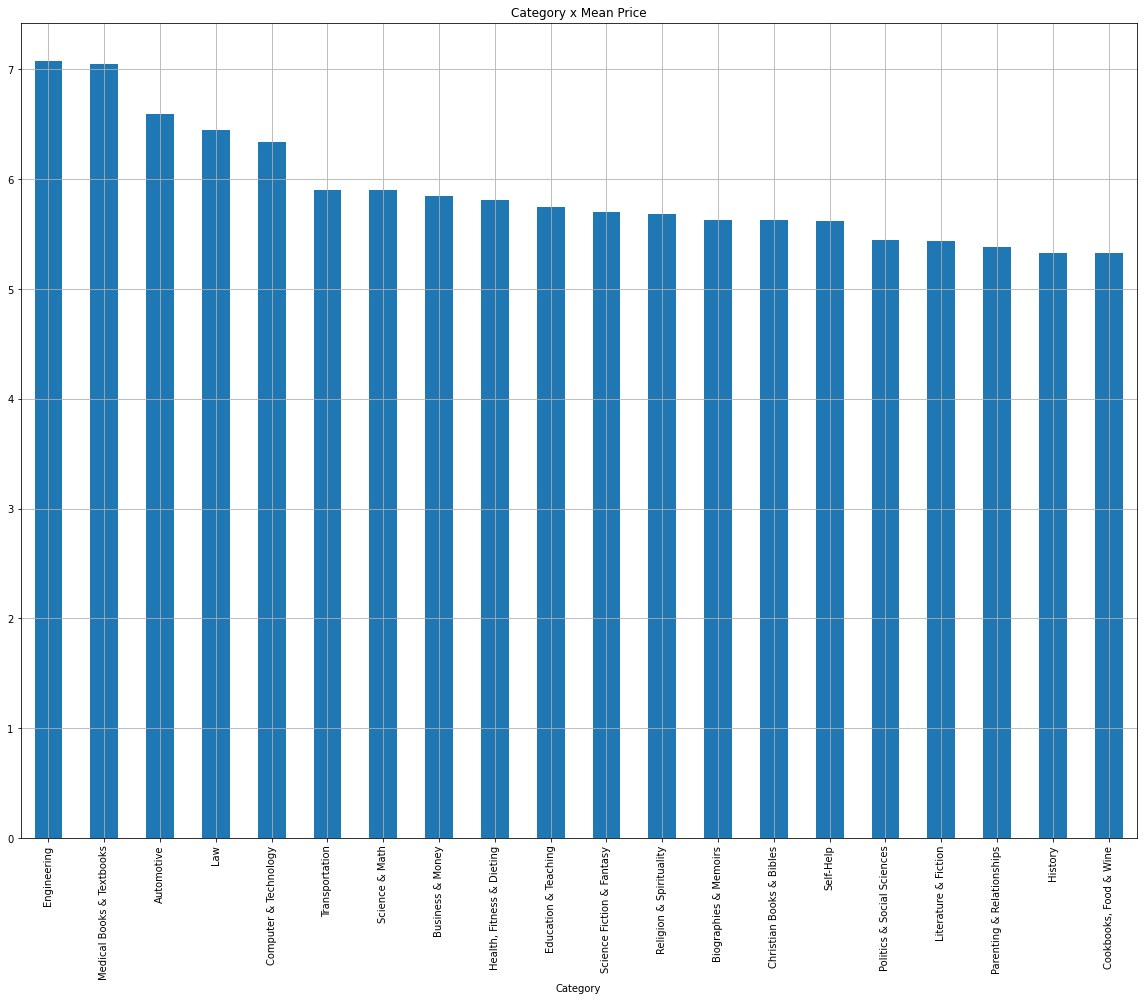

In [ ]:
import matplotlib.pyplot as plt

amazon_data['OriginalPrice'] = amazon_data['OriginalPrice'].astype(str).apply(lambda price: price[1:])
amazon_data['OriginalPrice'] = pd.to_numeric(amazon_data['OriginalPrice'], errors='coerce')

plt.figure(figsize=(20,15))
by_category = amazon_data.groupby('Category')['OriginalPrice'].mean().sort_values(ascending=False)
by_category.head(20).plot(kind='bar', grid=True, title='Category x Mean Price')

## The book title, author(s), rating and category are common columns in both datasets

In [ ]:
scribd_data = scribd_data.drop(columns=['Num_Pages', 'Subcategory'])
amazon_data = amazon_data.drop(columns=['NumRatings', 'Date', 'DiscountedPrice', 'OriginalPrice'])

scribd_data.columns, amazon_data.columns

(Index(['Book_Title', 'Author', 'Rating', 'Category'], dtype='object'),
 Index(['Book_Title', 'Authors', 'Category', 'Rating'], dtype='object'))

## We rename the column in the Scribd dataset

In [ ]:
scribd_data = scribd_data.rename(columns={'Author': 'Authors'})

## We merge the 2 datasets

In [ ]:
data = pd.concat([scribd_data, amazon_data])

data

,Book_Title,Authors,Rating,Category
0,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis,3.5,Self-Help
1,Never Split the Difference: Negotiating As If ...,Chris Voss,4.5,Self-Help
2,Grit: The Power of Passion and Perseverance,Angela Duckworth,4.0,Self-Help
3,Principles: Life and Work,Ray Dalio,4.0,Self-Help
4,Building a StoryBrand: Clarify Your Message So...,Donald Miller,4.0,Self-Help
...,...,...,...,...
14956,"The Phantom Atlas: The Greatest Myths, Lies an...",Edward Brooke-Hitching,4.6,Travel
14957,Trees of Ohio Field Guide (Tree Identification...,Stan Tekiela,4.7,Travel
14958,"Lonely Planet Cancun, Cozumel & the Yucatan (R...","Lonely Planet, Ray Bartlett",4.5,Travel
14959,Rocky Mountain National Park (National Geograp...,nan,4.8,Travel


## We drop the books with the same title (duplicates)

In [ ]:
data = data.drop_duplicates(subset='Book_Title')

data

,Book_Title,Authors,Rating,Category
0,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis,3.5,Self-Help
1,Never Split the Difference: Negotiating As If ...,Chris Voss,4.5,Self-Help
2,Grit: The Power of Passion and Perseverance,Angela Duckworth,4.0,Self-Help
3,Principles: Life and Work,Ray Dalio,4.0,Self-Help
4,Building a StoryBrand: Clarify Your Message So...,Donald Miller,4.0,Self-Help
...,...,...,...,...
14955,Birds of Washington Field Guide,Stan Tekiela,4.8,Travel
14957,Trees of Ohio Field Guide (Tree Identification...,Stan Tekiela,4.7,Travel
14958,"Lonely Planet Cancun, Cozumel & the Yucatan (R...","Lonely Planet, Ray Bartlett",4.5,Travel
14959,Rocky Mountain National Park (National Geograp...,nan,4.8,Travel


In [ ]:
data.isna().sum()

Book_Title      0
Authors         0
Rating        164
Category        0
dtype: int64

In [ ]:
data.loc[data['Authors'] == 'nan']

,Book_Title,Authors,Rating,Category
3,Chanel: Collections and Creations,nan,4.9,Arts & Photography
11,Born a Crime: Stories from a South African Chi...,nan,4.8,Arts & Photography
13,The Ultimate Guide to Modern Calligraphy & Han...,nan,4.6,Arts & Photography
24,Essential Elements for Strings - Book 1 with E...,nan,4.7,Arts & Photography
25,Pretty Simple Lettering: Modern Calligraphy & ...,nan,4.7,Arts & Photography
...,...,...,...,...
14944,Cómo Analizar a las Personas con Psicología [H...,nan,4.7,Travel
14946,Grand Canyon National Park [Map Pack Bundle] (...,nan,4.6,Travel
14947,"Linville Gorge, Mount Mitchell [Pisgah Nationa...",nan,4.6,Travel
14950,Italy: An Amazing Place (Sassi Travel),nan,4.7,Travel


## We drop rows that have missing Authors and Rating

In [ ]:
data = data.loc[(data['Authors'] != 'nan') & (data['Authors'] != '') & (~(data['Rating'].isna()))]

data

,Book_Title,Authors,Rating,Category
0,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis,3.5,Self-Help
1,Never Split the Difference: Negotiating As If ...,Chris Voss,4.5,Self-Help
2,Grit: The Power of Passion and Perseverance,Angela Duckworth,4.0,Self-Help
3,Principles: Life and Work,Ray Dalio,4.0,Self-Help
4,Building a StoryBrand: Clarify Your Message So...,Donald Miller,4.0,Self-Help
...,...,...,...,...
14952,Star Wars Droids Mad Libs,Brandon T. Snider,4.6,Travel
14953,Fifty Places to Fly Fish Before You Die,Chris Santella,4.7,Travel
14955,Birds of Washington Field Guide,Stan Tekiela,4.8,Travel
14957,Trees of Ohio Field Guide (Tree Identification...,Stan Tekiela,4.7,Travel


### We check NaNs

In [ ]:
data.isna().sum()

Book_Title    0
Authors       0
Rating        0
Category      0
dtype: int64

# Exploratory Data Analysis of our merged dataset

## Top rated books

In [ ]:
top_rated_books = data.sort_values(by='Rating', ascending=False).head(20)

top_rated_books.head(10)

,Book_Title,Authors,Rating,Category
60067,Love Ain't Nothing but Sex Misspelled: Stories,Harlan Ellison,5.0,Humor & Entertainment
49790,Advanced Fiber Spinning Technology,T. Nakajima,5.0,Computer & Technology
49757,Handbook of Adhesive Bonded Structural Repair,Raymond F. Wegman,5.0,Computer & Technology
49764,Optimisation of Composite Structures Design,A Miravete,5.0,Computer & Technology
5763,How to Be an Inclusive Leader: Your Role in Cr...,Jennifer Brown,5.0,Business & Money
49765,Lightweight Ballistic Composites: Military and...,Elsevier Books Reference,5.0,Computer & Technology
49766,Processes and Mechanisms of Welding Residual S...,Elsevier Books Reference,5.0,Computer & Technology
49774,Handbook of Analytical Techniques in Concrete ...,V. S. Ramachandran,5.0,Computer & Technology
49776,"Ceramic-Matrix Composites: Microstructure, Pro...",Elsevier Books Reference,5.0,Computer & Technology
76168,1984 Study Guide,Orwell Publishing Group,5.0,Literature & Fiction


## Average rating by Category

In [ ]:
by_category = data.groupby('Category', as_index=False)['Rating'].mean().sort_values('Rating', ascending=False)

by_category

,Category,Rating
5,Christian Books & Bibles,4.772283
18,Parenting & Relationships,4.645758
16,Medical Books & Textbooks,4.629880
28,Transportation,4.614970
10,Engineering,4.602895
1,Automotive,4.550566
11,"Health, Fitness & Dieting",3.838376
4,Childrens,3.665079
23,Science & Math,3.581275
0,Arts & Photography,3.542624


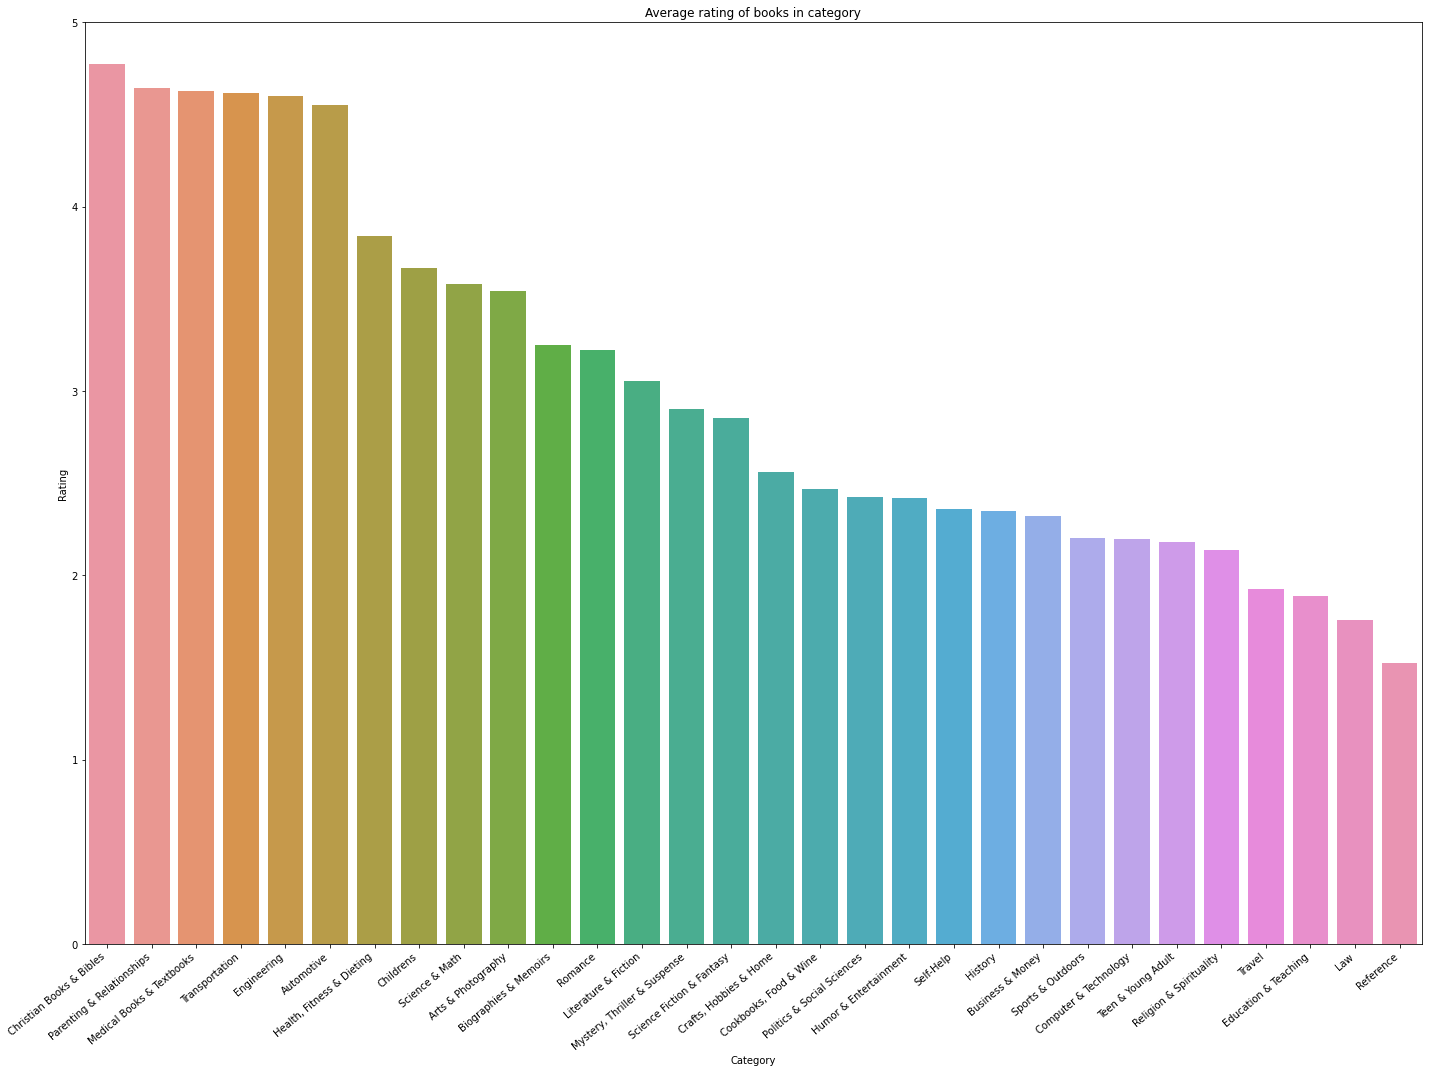

In [ ]:
plt.figure(figsize=(20,15))
plt.ylim((0, 5))
plt.title("Average rating of books in category")
ax = sns.barplot(x="Category", y="Rating", data=by_category)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Count of books per category

In [ ]:
by_category = data.groupby('Category', as_index=False)['Book_Title'].count().sort_values('Book_Title', ascending=False)

by_category

,Category,Book_Title
6,Computer & Technology,6913
27,Teen & Young Adult,6894
3,Business & Money,6339
21,Religion & Spirituality,5364
19,Politics & Social Sciences,5000
20,Reference,4743
22,Romance,4595
17,"Mystery, Thriller & Suspense",4246
2,Biographies & Memoirs,3984
9,Education & Teaching,3913


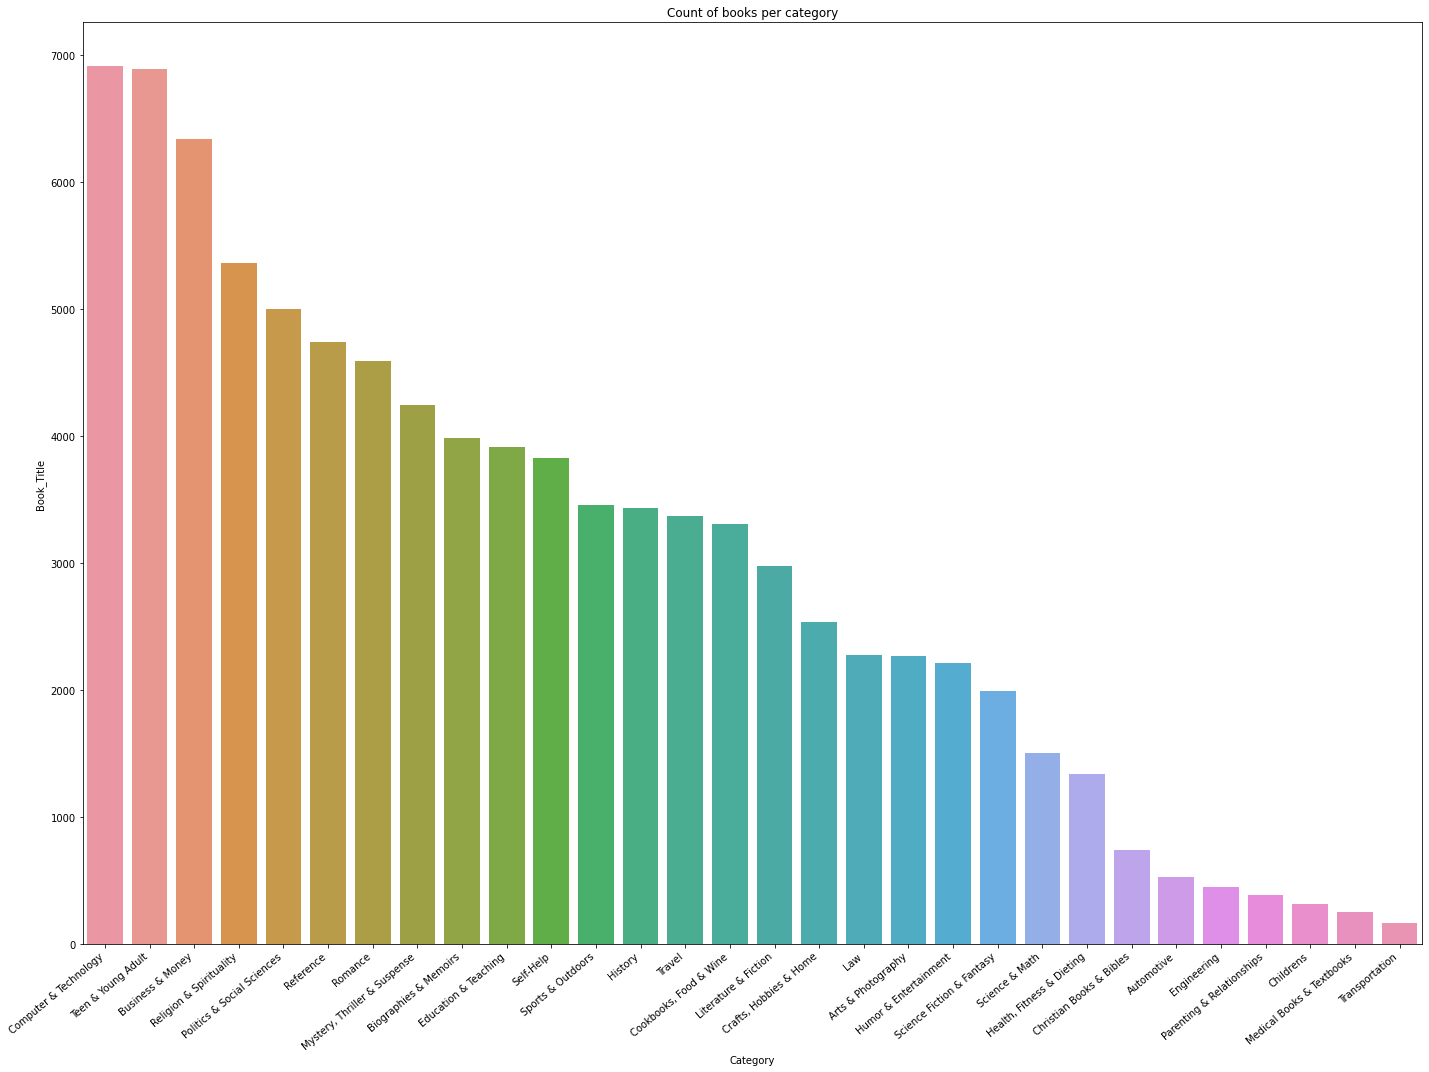

In [ ]:
plt.figure(figsize=(20,15))
plt.title("Count of books per category")
ax = sns.barplot(x="Category", y="Book_Title", data=by_category)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Number of books written by a certain author

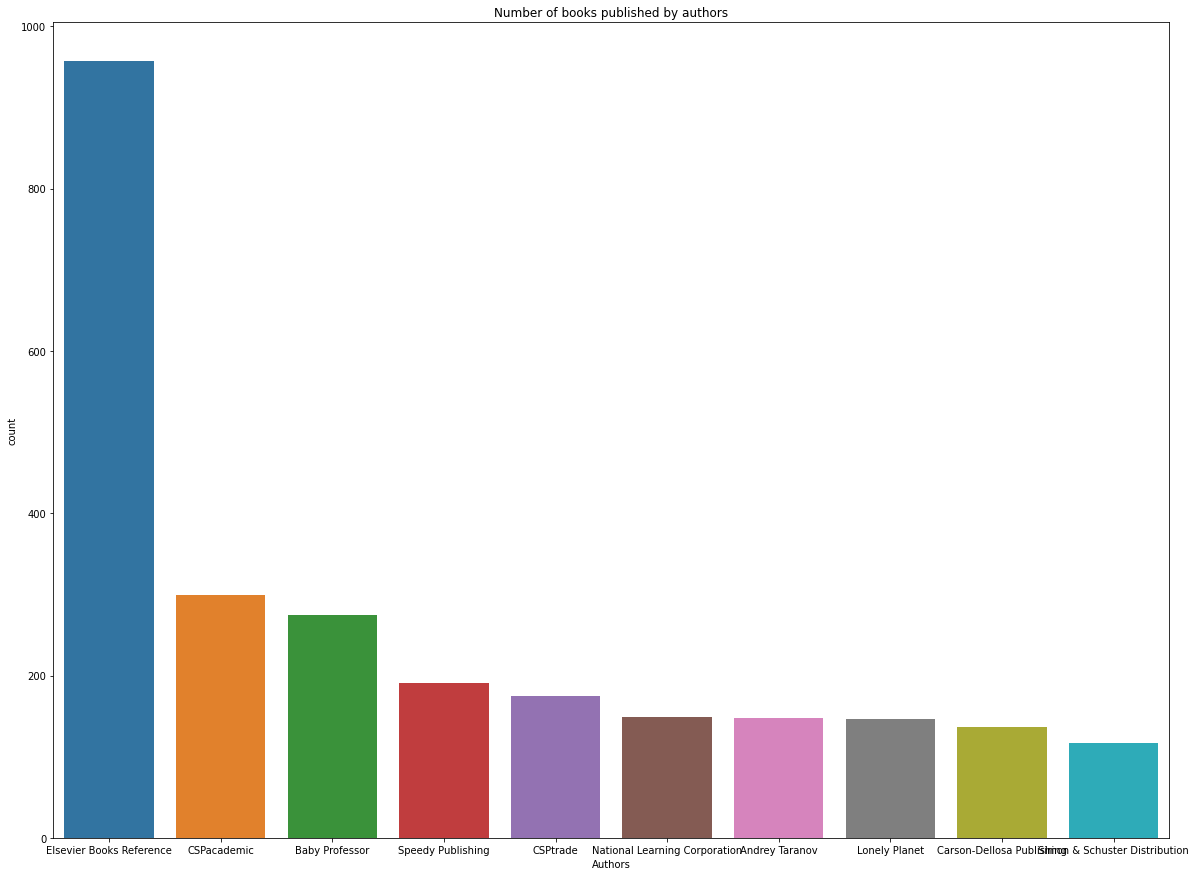

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.title("Number of books published by authors")
sns.countplot(x = "Authors", order=data['Authors'].value_counts().index[0:10], data=data)

## Distribution of ratings

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


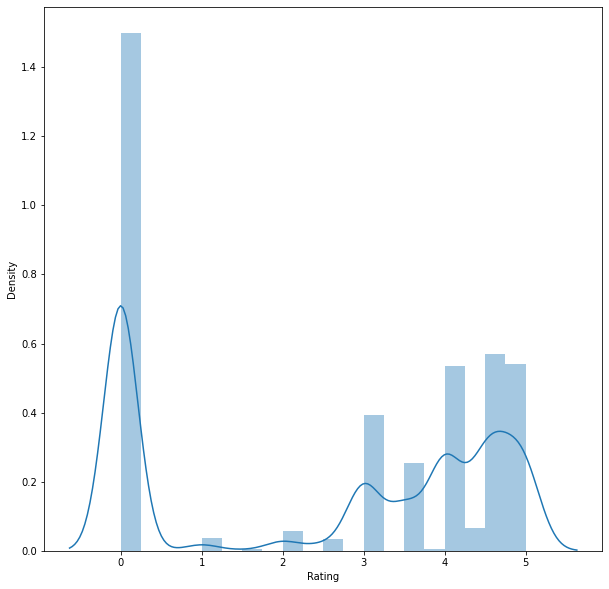

In [ ]:
plt.figure(figsize=(10,10))
rating = data.Rating.astype(float)
sns.distplot(rating, bins=20)

## Distribution of ratings in bins

In [ ]:
def segregation(data):
    values = []
    for val in data.Rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values

89331


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


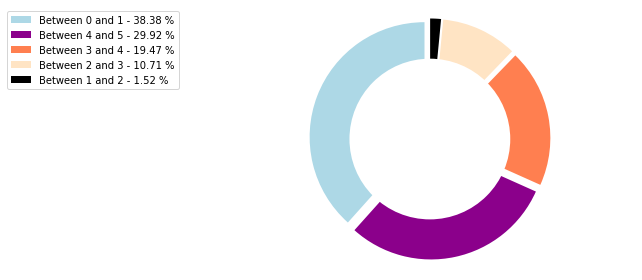

In [ ]:
data['Ratings_Dist'] = segregation(data)
ratings_pie = data['Ratings_Dist'].value_counts().reset_index()
labels = ratings_pie['index']
colors = ['lightblue','darkmagenta','coral','bisque', 'black']
percent = 100.*ratings_pie['Ratings_Dist']/ratings_pie['Ratings_Dist'].sum()
fig, ax1 = plt.subplots()
ax1.pie(ratings_pie['Ratings_Dist'],colors = colors, 
        pctdistance=0.85, startangle=90, explode=(0.05, 0.05, 0.05, 0.05, 0.05))
centre_circle = plt.Circle((0,0), 0.70, fc ='white')
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend( labels, loc = 'best',bbox_to_anchor=(-0.1, 1.),)

## Wordcloud of all the titles

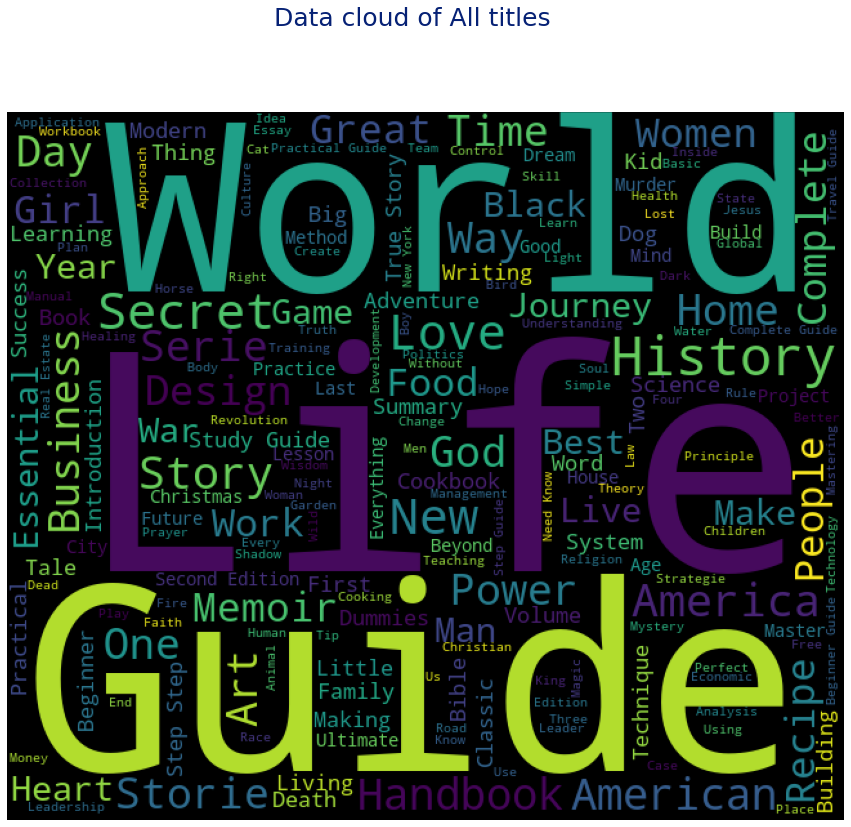

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

title_value = data.Book_Title.unique()
plt.subplots(figsize=(15,15))
wordcloud = \
  WordCloud(
    background_color='#000',
    width=650,
    height=550,
    stopwords=(STOPWORDS | set(['Book', 'Novel'])),
  ).generate(" ".join(title_value))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.figtext(.5,.91,'Data cloud of All titles', color='#062175', fontsize=25, ha='center')
plt.show()

# Preprocessing of the merged dataset

In [ ]:
data.to_csv('before_preprocessing_data.csv')
!cp before_preprocessing_data.csv 'drive/My Drive/PR Proekt'

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('drive/My Drive/PR Proekt/before_preprocessing_data.csv')
data = data.drop(columns='Unnamed: 0')

## We one-hot encode the categories

In [ ]:
dummies = pd.get_dummies(data['Category'])

data = pd.concat([data, dummies], axis=1)

data = data.drop(columns="Category")

data

,Book_Title,Authors,Rating,Arts & Photography,Automotive,Biographies & Memoirs,Business & Money,Childrens,Christian Books & Bibles,Computer & Technology,"Cookbooks, Food & Wine","Crafts, Hobbies & Home",Education & Teaching,Engineering,"Health, Fitness & Dieting",History,Humor & Entertainment,Law,Literature & Fiction,Medical Books & Textbooks,"Mystery, Thriller & Suspense",Parenting & Relationships,Politics & Social Sciences,Reference,Religion & Spirituality,Romance,Science & Math,Science Fiction & Fantasy,Self-Help,Sports & Outdoors,Teen & Young Adult,Transportation,Travel
0,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Never Split the Difference: Negotiating As If ...,Chris Voss,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Grit: The Power of Passion and Perseverance,Angela Duckworth,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Principles: Life and Work,Ray Dalio,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Building a StoryBrand: Clarify Your Message So...,Donald Miller,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89326,Star Wars Droids Mad Libs,Brandon T. Snider,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89327,Fifty Places to Fly Fish Before You Die,Chris Santella,4.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89328,Birds of Washington Field Guide,Stan Tekiela,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
89329,Trees of Ohio Field Guide (Tree Identification...,Stan Tekiela,4.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## We divide the Rating column into bins

In [ ]:
data['Ratings_Dist'] = segregation(data)

dummies = data['Ratings_Dist'].str.get_dummies(sep=",")

data = pd.concat([data, dummies], axis=1)

data = data.drop(columns="Ratings_Dist")

data

89331


,Book_Title,Authors,Rating,Arts & Photography,Automotive,Biographies & Memoirs,Business & Money,Childrens,Christian Books & Bibles,Computer & Technology,"Cookbooks, Food & Wine","Crafts, Hobbies & Home",Education & Teaching,Engineering,"Health, Fitness & Dieting",History,Humor & Entertainment,Law,Literature & Fiction,Medical Books & Textbooks,"Mystery, Thriller & Suspense",Parenting & Relationships,Politics & Social Sciences,Reference,Religion & Spirituality,Romance,Science & Math,Science Fiction & Fantasy,Self-Help,Sports & Outdoors,Teen & Young Adult,Transportation,Travel,Between 0 and 1,Between 1 and 2,Between 2 and 3,Between 3 and 4,Between 4 and 5
0,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,Never Split the Difference: Negotiating As If ...,Chris Voss,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,Grit: The Power of Passion and Perseverance,Angela Duckworth,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,Principles: Life and Work,Ray Dalio,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,Building a StoryBrand: Clarify Your Message So...,Donald Miller,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89326,Star Wars Droids Mad Libs,Brandon T. Snider,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
89327,Fifty Places to Fly Fish Before You Die,Chris Santella,4.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
89328,Birds of Washington Field Guide,Stan Tekiela,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
89329,Trees of Ohio Field Guide (Tree Identification...,Stan Tekiela,4.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## Use bag of words method for titles

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)
count_vector = vectorizer.fit_transform(data['Book_Title'].values)

data = pd.concat([data, pd.DataFrame(count_vector.toarray())], axis=1)

data

,Book_Title,Authors,Rating,Arts & Photography,Automotive,Biographies & Memoirs,Business & Money,Childrens,Christian Books & Bibles,Computer & Technology,"Cookbooks, Food & Wine","Crafts, Hobbies & Home",Education & Teaching,Engineering,"Health, Fitness & Dieting",History,Humor & Entertainment,Law,Literature & Fiction,Medical Books & Textbooks,"Mystery, Thriller & Suspense",Parenting & Relationships,Politics & Social Sciences,Reference,Religion & Spirituality,Romance,Science & Math,Science Fiction & Fantasy,Self-Help,Sports & Outdoors,Teen & Young Adult,Transportation,Travel,Between 0 and 1,Between 1 and 2,Between 2 and 3,Between 3 and 4,Between 4 and 5,0,1,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Never Split the Difference: Negotiating As If ...,Chris Voss,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Grit: The Power of Passion and Perseverance,Angela Duckworth,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Principles: Life and Work,Ray Dalio,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Building a StoryBrand: Clarify Your Message So...,Donald Miller,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89326,Star Wars Droids Mad Libs,Brandon T. Snider,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89327,Fifty Places to Fly Fish Before You Die,Chris Santella,4.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
89328,Birds of Washington Field Guide,Stan Tekiela,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89329,Trees of Ohio Field Guide (Tree Identification...,Stan Tekiela,4.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Take a random sample of 20,000 instances because of limited computing power (we need to fit KMeans many times to find optimal number of clusters)

In [ ]:
import random

random.seed(43)

random_indices = random.sample(list(data.index), 20000)

data = data.loc[random_indices]

data

,Book_Title,Authors,Rating,Arts & Photography,Automotive,Biographies & Memoirs,Business & Money,Childrens,Christian Books & Bibles,Computer & Technology,"Cookbooks, Food & Wine","Crafts, Hobbies & Home",Education & Teaching,Engineering,"Health, Fitness & Dieting",History,Humor & Entertainment,Law,Literature & Fiction,Medical Books & Textbooks,"Mystery, Thriller & Suspense",Parenting & Relationships,Politics & Social Sciences,Reference,Religion & Spirituality,Romance,Science & Math,Science Fiction & Fantasy,Self-Help,Sports & Outdoors,Teen & Young Adult,Transportation,Travel,Between 0 and 1,Between 1 and 2,Between 2 and 3,Between 3 and 4,Between 4 and 5,0,1,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
5053,Game Changers: 7 Things Every Financial Adviso...,Thomas Miller,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37497,The Clean Water Act Handbook,NBN Books,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18865,Lonely Planet Korea,Lonely Planet,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60625,Rest You Merry,Charlotte MacLeod,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48480,RF Circuit Design,Christopher Bowick,3.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17448,Spies of Revolutionary Connecticut: From Bened...,Mark Allen Baker,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77301,High Achiever: The Incredible True Story of On...,Tiffany Jenkins,4.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43426,Pattern Recognition,Konstantinos Koutroumbas,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5118,How to Price Your Products and Services,Dr Jim Porter,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
titles = data['Book_Title']
data_copy = data.copy()
data = data.drop(columns=['Book_Title', 'Authors'])

## Standardizing the data to have mean = 0 and variance = 1

In [ ]:
from sklearn.preprocessing import StandardScaler

data = StandardScaler().fit_transform(data)

data

array([[ 0.72345001, -0.17127778, -0.07736675, ..., -0.22380629,
        -0.05586716, -0.0381065 ],
       [ 1.20893968, -0.17127778, -0.07736675, ..., -0.22380629,
        -0.05586716, -0.0381065 ],
       [ 0.23796034, -0.17127778, -0.07736675, ..., -0.22380629,
        -0.05586716, -0.0381065 ],
       ...,
       [ 0.96619484, -0.17127778, -0.07736675, ..., -0.22380629,
        -0.05586716, -0.0381065 ],
       [-0.73301901, -0.17127778, -0.07736675, ...,  3.2951606 ,
        -0.05586716, -0.0381065 ],
       [ 0.48070517, -0.17127778, -0.07736675, ..., -0.22380629,
        -0.05586716, -0.0381065 ]])

## PCA

### Reduce the dimensionality for the price of reducing the variance (amount of information)


### The number of components needed to explain variance

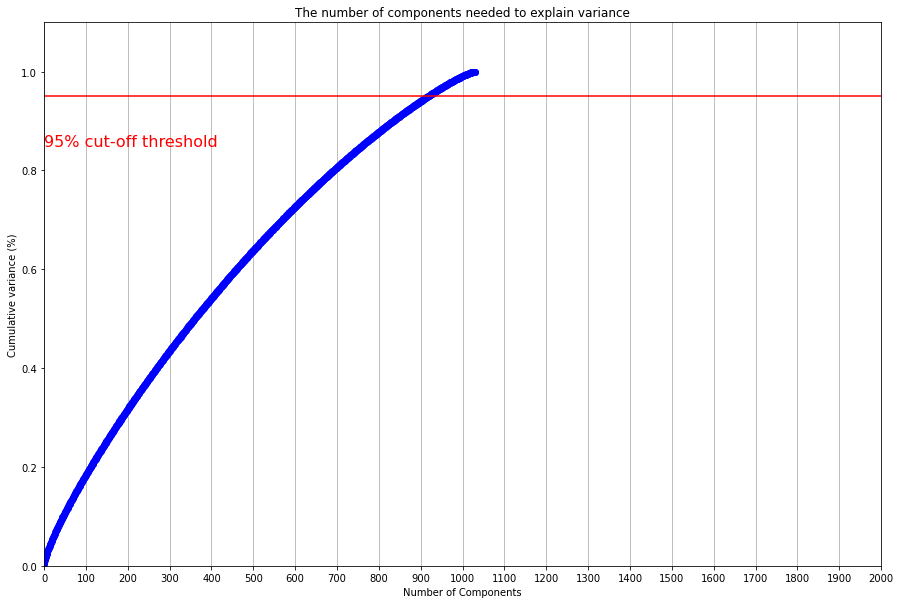

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(data)

plt.rcParams["figure.figsize"] = (15,10)

fig, ax = plt.subplots()
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.xlim(100, 300)
plt.plot(range(0, 1031), y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 2031, step=100))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

### We decide 95% variance is good enough

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
data = pca.fit_transform(data)

data.shape

(20000, 921)

In [ ]:
pd.DataFrame(data).to_csv('preprocessed_data.csv')
!cp preprocessed_data.csv 'drive/My Drive/PR Proekt'

# Clustering
## How many clusters do I initialize KMeans with?

Fitted algorithm with k=2
Fitted algorithm with k=52
Fitted algorithm with k=102
Fitted algorithm with k=152
Fitted algorithm with k=202
Fitted algorithm with k=252
Fitted algorithm with k=302
Fitted algorithm with k=352
Fitted algorithm with k=402
Fitted algorithm with k=452
Fitted algorithm with k=502


Text(0.5, 1.0, 'Elbow Curve')

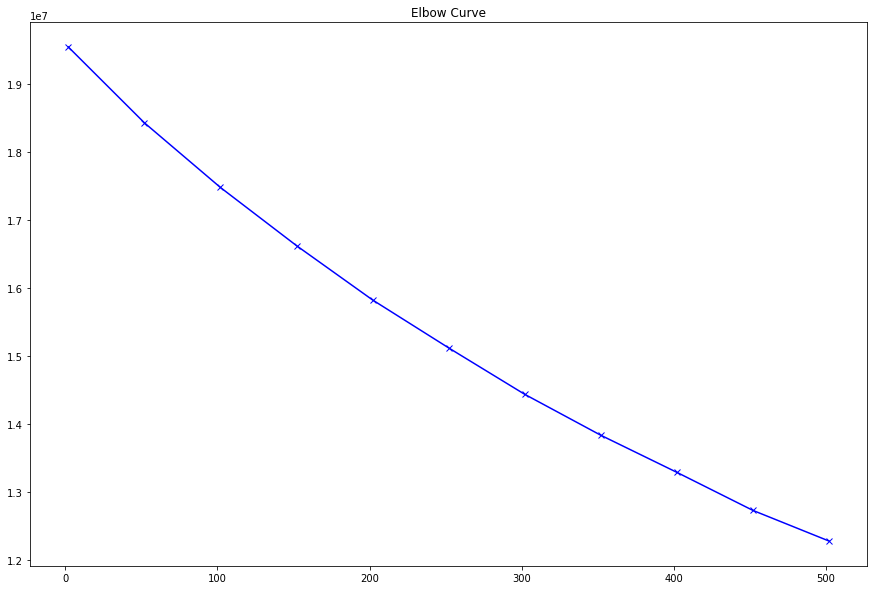

In [ ]:
from sklearn.cluster import KMeans

distortions = []

for k in range(2, 503, 50):
    k_means = KMeans(n_clusters=k, init='k-means++', random_state=42, max_iter=200)
    k_means.fit(data)
    print(f'Fitted algorithm with k={k}')
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2, 503, 50), distortions, 'bx-')
plt.title("Elbow Curve")

## Distortions for range(2, 503, 50)

In [ ]:
distortions

[19538419.10748859,
 18424958.147571065,
 17474904.4157048,
 16620823.80666462,
 15823354.570271943,
 15119498.113420501,
 14437745.594820406,
 13836865.904496782,
 13292119.997794291,
 12733218.669742506,
 12283660.444698567]

## Second batch of fitting KMeans

Fitted algorithm with k=1000


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Fitted algorithm with k=1500


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Fitted algorithm with k=2000


Text(0.5, 1.0, 'Elbow Curve')

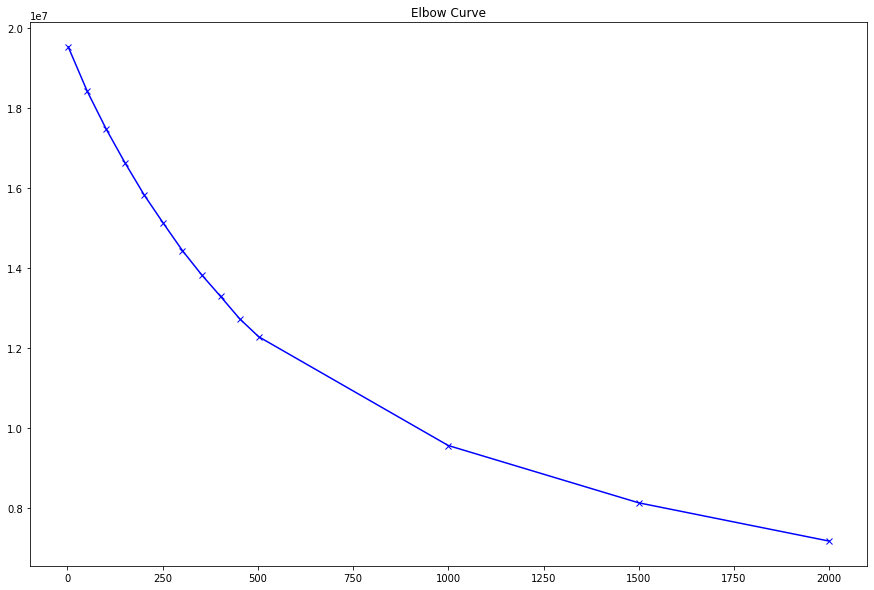

In [ ]:
from sklearn.cluster import KMeans

for k in [1000, 1500, 2000]:
    k_means = KMeans(n_clusters=k, init='k-means++', random_state=42, max_iter=200, n_jobs=-1)
    k_means.fit(data)
    print(f'Fitted algorithm with k={k}')
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
x = list(range(2, 503, 50)) + [1000, 1500, 2000]
plt.plot(x, distortions, 'bx-')
plt.title("Elbow Curve")

## Distortions for every fit

In [ ]:
distortions

[19538419.10748859,
 18424958.147571065,
 17474904.4157048,
 16620823.80666462,
 15823354.570271943,
 15119498.113420501,
 14437745.594820406,
 13836865.904496782,
 13292119.997794291,
 12733218.669742506,
 12283660.444698567,
 9559402.787969287,
 8125370.007842326,
 7167448.26982637]

## k = 1500 clusters is the Elbow approximately

In [ ]:
from scipy.cluster.vq import kmeans, vq

centroids, _ = kmeans(data, 1500)

centroids

array([[-1.51352158e+00,  7.97188125e-01,  2.09750885e-01, ...,
         2.03755664e-01,  2.63132677e-04,  3.19102733e-01],
       [ 5.76879288e+00, -3.29054874e+00,  1.48530066e+00, ...,
        -6.61297923e-01, -1.25185872e+00,  1.68434390e+00],
       [ 1.14032084e+00, -1.95930670e+00,  1.05719209e+00, ...,
        -7.32756188e-01, -2.60344653e-01, -1.40849036e-01],
       ...,
       [-1.52133875e+00,  3.20117832e-01, -5.36331983e-01, ...,
        -9.60287976e-01, -4.59993357e-01, -1.71920445e-01],
       [-1.58556113e+00,  1.13212055e+00,  3.47000470e-01, ...,
         5.14711242e-02, -1.22291181e-01, -2.92514562e-01],
       [ 7.68359793e+00, -1.59136643e+01,  1.84418512e+01, ...,
         3.47318811e-01, -1.47939306e-01, -4.32848466e-01]])

# Recommendation

In [ ]:
from sklearn import neighbors

model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(data)
distance, indices = model.kneighbors(data)

In [ ]:
def get_index_from_name(name):
  return np.where(data_copy["Book_Title"]==name)[0]

all_books_names = list(titles.values)

def get_id_from_partial_name(partial):
  for name in all_books_names:
    if partial in name:
      print(name, all_books_names.index(name))

pd.options.display.max_colwidth = 200

def print_similar_books(query=None, id=None):
  if id:
    for id in indices[id]:
      print(data_copy.iloc[id]["Book_Title"])
  if query:
    found_id = get_index_from_name(query)
    for id in indices[found_id]:
      print(data_copy.iloc[id]["Book_Title"])

In [ ]:
data_copy

,Book_Title,Authors,Rating,Arts & Photography,Automotive,Biographies & Memoirs,Business & Money,Childrens,Christian Books & Bibles,Computer & Technology,"Cookbooks, Food & Wine","Crafts, Hobbies & Home",Education & Teaching,Engineering,"Health, Fitness & Dieting",History,Humor & Entertainment,Law,Literature & Fiction,Medical Books & Textbooks,"Mystery, Thriller & Suspense",Parenting & Relationships,Politics & Social Sciences,Reference,Religion & Spirituality,Romance,Science & Math,Science Fiction & Fantasy,Self-Help,Sports & Outdoors,Teen & Young Adult,Transportation,Travel,Between 0 and 1,Between 1 and 2,Between 2 and 3,Between 3 and 4,Between 4 and 5,0,1,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
5053,Game Changers: 7 Things Every Financial Adviso...,Thomas Miller,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37497,The Clean Water Act Handbook,NBN Books,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18865,Lonely Planet Korea,Lonely Planet,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60625,Rest You Merry,Charlotte MacLeod,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48480,RF Circuit Design,Christopher Bowick,3.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17448,Spies of Revolutionary Connecticut: From Bened...,Mark Allen Baker,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77301,High Achiever: The Incredible True Story of On...,Tiffany Jenkins,4.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43426,Pattern Recognition,Konstantinos Koutroumbas,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5118,How to Price Your Products and Services,Dr Jim Porter,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
print_similar_books("Lonely Planet Korea")

18865            Lonely Planet Korea
18831            Lonely Planet Nepal
20123        Lonely Planet Andalucia
20999    Lonely Planet Southwest USA
18852          Lonely Planet Beijing
18836        Lonely Planet Indonesia
Name: Book_Title, dtype: object


In [ ]:
print_similar_books(id = 200)

Law & Order: Detective, criminal, lawyer, who should be the prisoner?
Criminal Law
Criminal Sociology
Criminal Evidence
Criminal Investigation: Law and Practice
Criminal


In [ ]:
print_similar_books('The Clean Water Act Handbook')

37497                                                        The Clean Water Act Handbook
37552                                                  The Clean Water Act 20 Years Later
53264                                           The Dirt on Clean: An Unsanitized History
78279                                                      Clean: The New Science of Skin
63047                                       Mornings on Main: A Clean & Wholesome Romance
52846    A Shameful Act: The Armenian Genocide and the Question of Turkish Responsibility
Name: Book_Title, dtype: object


In [ ]:
print_similar_books('French Vocabulary')

34120                                                     French Vocabulary
34218                        French Vocabulary (Blokehead Easy Study Guide)
33700    HSK 1 Vocabulary Guide: Vocabularies, Pinyin and Example Sentences
32103                                                        SAT Vocabulary
32205                                                Exambusters Vocabulary
33947                               English Vocabulary Flashcards: Clothing
Name: Book_Title, dtype: object


In [ ]:
print_similar_books('Frozen Assets: Cook for a Day, Eat for a Month')

24613                                                 Frozen Assets: Cook for a Day, Eat for a Month
24506                                     The Can't Cook Book: Recipes for the Absolutely Terrified!
23114    Canoe and Camp Cookery: A Practical Cook Book for Canoeists, Corinthian Sailors, and Outers
24460                                                              How To Cook Everything In A Jiffy
22884                     Kitchen Confidant: An Indispensable Guide for the Baker, Drinker, and Cook
22689                                                                 Everyday Dorie: The Way I Cook
Name: Book_Title, dtype: object


In [ ]:
print_similar_books('Mornings in Mexico')

20193                                                             Mornings in Mexico
20183                  Lawrence, Greene and Lowry: The Fictional Landscape of Mexico
15608    The Remittance Landscape: Spaces of Migration in Rural Mexico and Urban USA
19710                                            Mexico's Oaxaca, Chiapas & Palenque
19620                                          Raptors of Mexico and Central America
53200                              The Ute Indians of Utah, Colorado, and New Mexico
Name: Book_Title, dtype: object


In [ ]:
print_similar_books('Xbox One or PS4 [PlayStation 4]: Which New Video Game Console Should You Buy? A Comparison of Xbox 1 and PS4 Price, Features, Specs, Games and Release Dates')

14177    Xbox One or PS4 [PlayStation 4]: Which New Video Game Console Should You Buy? A Comparison of Xbox 1 and PS4 Price, Features, Specs, Games and Release Dates
57923                                                                                                                 Halos and Avatars: Playing Video Games with God
83579                                                                                                                              Trapped in a Video Game (Volume 1)
14221                                                                                                             Game Time: Understanding Temporality in Video Games
14184                                                                                                       Moral Combat: Why the War on Violent Video Games Is Wrong
14087                                                                                                         Thinking about Video Games: Interviews with the Experts
Name

In [ ]:
print_similar_books('4th Grade Science Workbook: Marine Life')

13482                      4th Grade Science Workbook: Marine Life
69653    Creepy Crawly Insects : 1st Grade Science Workbook Series
35955                                             Science, Grade 4
35929                                             Science, Grade 2
35924                                             Science, Grade 3
60148                                                    Idiopathy
Name: Book_Title, dtype: object


In [ ]:
print_similar_books('Africa')

18646                                                                                          Africa
18618                                                                               Stanley in Africa
18629    Kilimanjaro: Ascent preparations, practicalities and trekking routes to the 'Roof of Africa'
16200                                                                  Queer Africa: Selected stories
18474                                                                            Africa Safari Travel
10031                                                                        Africa: A Modern History
Name: Book_Title, dtype: object


In [ ]:
print_similar_books('Animals from Australia')

29679                          Animals from Australia
19021                             Moving to Australia
16834    Half a Citizen: Life on Welfare in Australia
7518                      Every-Day Traders Australia
19106                   I Love Australia Travel Guide
19129                      House Sitting in Australia
Name: Book_Title, dtype: object


# Classification

## XGBoost

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('drive/My Drive/PR Proekt/before_preprocessing_data.csv')
data = data.drop(columns='Unnamed: 0')

data

,Book_Title,Authors,Rating,Category
0,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis,3.5,Self-Help
1,Never Split the Difference: Negotiating As If ...,Chris Voss,4.5,Self-Help
2,Grit: The Power of Passion and Perseverance,Angela Duckworth,4.0,Self-Help
3,Principles: Life and Work,Ray Dalio,4.0,Self-Help
4,Building a StoryBrand: Clarify Your Message So...,Donald Miller,4.0,Self-Help
...,...,...,...,...
89326,Star Wars Droids Mad Libs,Brandon T. Snider,4.6,Travel
89327,Fifty Places to Fly Fish Before You Die,Chris Santella,4.7,Travel
89328,Birds of Washington Field Guide,Stan Tekiela,4.8,Travel
89329,Trees of Ohio Field Guide (Tree Identification...,Stan Tekiela,4.7,Travel


## The preprocessing is the same except we do not one-hot encode the Category variable (the label)

In [ ]:
data['Ratings_Dist'] = segregation(data)

dummies = data['Ratings_Dist'].str.get_dummies(sep=",")

data = pd.concat([data, dummies], axis=1)

data = data.drop(columns="Ratings_Dist")

data

89331


,Book_Title,Authors,Rating,Category,Between 0 and 1,Between 1 and 2,Between 2 and 3,Between 3 and 4,Between 4 and 5
0,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis,3.5,Self-Help,0,0,0,1,0
1,Never Split the Difference: Negotiating As If ...,Chris Voss,4.5,Self-Help,0,0,0,0,1
2,Grit: The Power of Passion and Perseverance,Angela Duckworth,4.0,Self-Help,0,0,0,1,0
3,Principles: Life and Work,Ray Dalio,4.0,Self-Help,0,0,0,1,0
4,Building a StoryBrand: Clarify Your Message So...,Donald Miller,4.0,Self-Help,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
89326,Star Wars Droids Mad Libs,Brandon T. Snider,4.6,Travel,0,0,0,0,1
89327,Fifty Places to Fly Fish Before You Die,Chris Santella,4.7,Travel,0,0,0,0,1
89328,Birds of Washington Field Guide,Stan Tekiela,4.8,Travel,0,0,0,0,1
89329,Trees of Ohio Field Guide (Tree Identification...,Stan Tekiela,4.7,Travel,0,0,0,0,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)
count_vector = vectorizer.fit_transform(data['Book_Title'].values)

data = pd.concat([data, pd.DataFrame(count_vector.toarray())], axis=1)

data

,Book_Title,Authors,Rating,Category,Between 0 and 1,Between 1 and 2,Between 2 and 3,Between 3 and 4,Between 4 and 5,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,"Girl, Stop Apologizing: A Shame-Free Plan for ...",Rachel Hollis,3.5,Self-Help,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Never Split the Difference: Negotiating As If ...,Chris Voss,4.5,Self-Help,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Grit: The Power of Passion and Perseverance,Angela Duckworth,4.0,Self-Help,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Principles: Life and Work,Ray Dalio,4.0,Self-Help,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Building a StoryBrand: Clarify Your Message So...,Donald Miller,4.0,Self-Help,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89326,Star Wars Droids Mad Libs,Brandon T. Snider,4.6,Travel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89327,Fifty Places to Fly Fish Before You Die,Chris Santella,4.7,Travel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
89328,Birds of Washington Field Guide,Stan Tekiela,4.8,Travel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89329,Trees of Ohio Field Guide (Tree Identification...,Stan Tekiela,4.7,Travel,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import random

random.seed(43)

random_indices = random.sample(list(data.index), 30000)

data = data.loc[random_indices]

data

,Book_Title,Authors,Rating,Category,Between 0 and 1,Between 1 and 2,Between 2 and 3,Between 3 and 4,Between 4 and 5,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
5053,Game Changers: 7 Things Every Financial Adviso...,Thomas Miller,4.0,Business & Money,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37497,The Clean Water Act Handbook,NBN Books,5.0,Law,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18865,Lonely Planet Korea,Lonely Planet,3.0,Travel,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60625,Rest You Merry,Charlotte MacLeod,3.0,"Mystery, Thriller & Suspense",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48480,RF Circuit Design,Christopher Bowick,3.5,Computer & Technology,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69471,Nowhere to Hide,Sigmund Brouwer,0.0,Teen & Young Adult,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57251,The Future of Continental Philosophy of Religion,Catherine Malabou,0.0,Religion & Spirituality,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68073,Golden Iris,R. Poling,0.0,Teen & Young Adult,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33721,Basics of Biblical Greek Workbook,William D. Mounce,4.0,Reference,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## We encode the label with LabelEncoder

In [ ]:
import xgboost as xgb
from sklearn import preprocessing

X = data.drop(columns=["Authors", "Rating", "Category", "Book_Title"])
y = data['Category']
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X, y

(       Between 0 and 1  Between 1 and 2  Between 2 and 3  ...  997  998  999
 5053                 0                0                0  ...    0    0    0
 37497                0                0                0  ...    0    0    0
 18865                0                0                1  ...    0    0    0
 60625                0                0                1  ...    0    0    0
 48480                0                0                0  ...    0    0    0
 ...                ...              ...              ...  ...  ...  ...  ...
 69471                1                0                0  ...    0    0    0
 57251                1                0                0  ...    0    0    0
 68073                1                0                0  ...    0    0    0
 33721                0                0                0  ...    0    0    0
 16731                1                0                0  ...    0    0    0
 
 [30000 rows x 1005 columns], array([ 3, 14, 29, ..., 27, 20, 

## We convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains

In [ ]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=43)

In [ ]:
xg_clf = xgb.XGBClassifier(objective="multi:softmax", max_depth=5, random_state=43, n_jobs=-1, verbosity=1)

In [ ]:
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=43,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## We predict the labels of test set examples in order to evaluate the model

In [ ]:
preds = xg_clf.predict(X_test)

preds

array([14, 12, 19, ..., 27, 20, 22])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy is {accuracy_score(preds, y_test)}")
print(f"Precission is {precision_score(preds, y_test, average='macro')}")
print(f"Recall is {recall_score(preds, y_test, average='macro')}")
print(f"F1 Score is {f1_score(preds, y_test, average='weighted')}")

Accuracy is 0.38911111111111113
Precission is 0.29878370964363676
Recall is 0.435830582134411
F1 Score is 0.39152022297382344


## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
preds = clf.predict(X_test)

preds

array([27, 27, 21, ..., 27,  3, 27])

In [ ]:
print(f"Accuracy is {accuracy_score(preds, y_test)}")
print(f"Precission is {precision_score(preds, y_test, average='weighted')}")
print(f"Recall is {recall_score(preds, y_test, average='micro')}")
print(f"F1 Score is {f1_score(preds, y_test, average='weighted')}")

Accuracy is 0.152
Precission is 0.6194352907058587
Recall is 0.152
F1 Score is 0.21587794160987173


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
preds = gnb_clf.predict(X_test)

preds

array([24,  9, 23, ...,  4,  8, 28])

In [ ]:
print(f"Accuracy is {accuracy_score(preds, y_test)}")
print(f"Precission is {precision_score(preds, y_test, average='weighted')}")
print(f"Recall is {recall_score(preds, y_test, average='macro')}")
print(f"F1 Score is {f1_score(preds, y_test, average='weighted')}")

Accuracy is 0.13444444444444445
Precission is 0.25080808818665595
Recall is 0.2312088533281255
F1 Score is 0.12456272436877665
